In [1]:
from __future__ import division, print_function
from tensorflow.python.keras.layers.core import Dense
from tensorflow.python.keras.layers import Dense,BatchNormalization
from tensorflow.python.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
import os
import matplotlib.pyplot as plt


In [2]:

os.environ["CUDA_VISIBLE_DEVICES"] = "" 
data = np.load('/home/chase/Boyka/Lyu/fac_cond256_unit8.npz')
raw_X=data['cond']
raw_X=np.squeeze(raw_X)
raw_X[0]
x_min=np.min(raw_X)
x_max=np.max(raw_X)
raw_Y=data['fac']
raw_Y=raw_Y.astype(np.float64)
y_min=[np.min(raw_Y[:,0]),np.min(raw_Y[:,1]),np.min(raw_Y[:,2])]
y_max=[np.max(raw_Y[:,0]),np.max(raw_Y[:,1]),np.max(raw_Y[:,2])]
# raw_X=(raw_X[:,0]-x_min)/(x_max-x_min)
raw_Y[:,0]=(raw_Y[:,0]-y_min[0])/(y_max[0]-y_min[0])
raw_Y[:,1]=(raw_Y[:,1]-y_min[1])/(y_max[1]-y_min[1])
raw_Y[:,2]=(raw_Y[:,2]-y_min[2])/(y_max[2]-y_min[2])
BATCH_SIZE = 256   
NUM_EPOCHS = 10000
Xtrain=raw_X[:-1000]
Ytrain=raw_Y[:-1000]
Xtest=raw_X[-1000:]
Ytest=raw_Y[-1000:]
print(y_max)
print(y_max[0]-y_min[0],y_max[1]-y_min[1],y_max[2]-y_min[2])

[4.999253, 0.849988, 0.029993]
3.9978760000000007 0.09995299999999996 0.029987


In [3]:
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)
Xtrain[0],Ytrain[0]

(2000, 65) (1000, 65) (2000, 3) (1000, 3)


(array([0.      , 0.195109, 0.390114, 0.581551, 0.754668, 0.910086,
        1.05162 , 1.18103 , 1.29792 , 1.39992 , 1.48112 , 1.52438 ,
        1.49314 , 1.3968  , 1.29393 , 1.20968 , 1.14404 , 1.09076 ,
        1.04499 , 1.00543 , 0.971878, 0.943974, 0.921199, 0.902677,
        0.887477, 0.8748  , 0.86406 , 0.854744, 0.846565, 0.839307,
        0.832844, 0.827054, 0.821828, 0.817045, 0.812608, 0.808448,
        0.804538, 0.800849, 0.79735 , 0.794043, 0.790948, 0.787993,
        0.785137, 0.78243 , 0.779863, 0.777406, 0.774991, 0.772333,
        0.768828, 0.765023, 0.761571, 0.758508, 0.755777, 0.753328,
        0.75111 , 0.749084, 0.747228, 0.745512, 0.743922, 0.742449,
        0.741078, 0.7398  , 0.738601, 0.737473, 0.736409]),
 array([0.1312632 , 0.4585155 , 0.21886151]))

In [4]:
model = Sequential()
model.add(Dense(64,activation= 'relu',input_shape=(65,)))
model.add(BatchNormalization())
model.add(Dense(128,activation= 'relu'))
model.add(BatchNormalization())
model.add(Dense(256,activation= 'relu'))
model.add(BatchNormalization())
model.add(Dense(100,activation= 'relu'))
model.add(BatchNormalization())
model.add(Dense(3))
model.summary()

model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4224      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               2

In [5]:
history=model.fit(Xtrain, Ytrain, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(Xtest, Ytest),shuffle=True)

score, _ = model.evaluate(Xtest, Ytest, batch_size=BATCH_SIZE)

model.save('data_norm_conv1d_10000ep.h5')



Epoch 1/10000
8/8 [==============================] - 1s 18ms/step - loss: 0.7113 - mean_squared_error: 0.7113 - val_loss: 0.3691 - val_mean_squared_error: 0.3691
Epoch 2/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2895 - mean_squared_error: 0.2895 - val_loss: 0.3614 - val_mean_squared_error: 0.3614
Epoch 3/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1996 - mean_squared_error: 0.1996 - val_loss: 0.3639 - val_mean_squared_error: 0.3639
Epoch 4/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1510 - mean_squared_error: 0.1510 - val_loss: 0.3691 - val_mean_squared_error: 0.3691
Epoch 5/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.1157 - mean_squared_error: 0.1157 - val_loss: 0.3698 - val_mean_squared_error: 0.3698
Epoch 6/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0836 - mean_squared_error: 0.0836 - val_loss: 0.3549 - val_mean_squared_error: 0.3549
Epoch 7/10000
8/8 [==============

8/8 [==============================] - 0s 4ms/step - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.1145 - val_mean_squared_error: 0.1145
Epoch 52/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.1215 - val_mean_squared_error: 0.1215
Epoch 53/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.1217 - val_mean_squared_error: 0.1217
Epoch 54/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.1338 - val_mean_squared_error: 0.1338
Epoch 55/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.0951 - val_mean_squared_error: 0.0951
Epoch 56/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0986 - val_mean_squared_error: 0.0986
Epoch 57/10000
8/8 [=======================

Epoch 102/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0826 - val_mean_squared_error: 0.0826
Epoch 103/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0863 - val_mean_squared_error: 0.0863
Epoch 104/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0707 - val_mean_squared_error: 0.0707
Epoch 105/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0616 - val_mean_squared_error: 0.0616
Epoch 106/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 107/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0684 - val_mean_squared_error: 0.0684
Epoch 108/10000
8/8 [=

8/8 [==============================] - 0s 5ms/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0686 - val_mean_squared_error: 0.0686
Epoch 153/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0502 - val_mean_squared_error: 0.0502
Epoch 154/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0710 - val_mean_squared_error: 0.0710
Epoch 155/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0542 - val_mean_squared_error: 0.0542
Epoch 156/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.1791 - val_mean_squared_error: 0.1791
Epoch 157/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0601 - val_mean_squared_error: 0.0601
Epoch 158/10000
8/8 [=================

8/8 [==============================] - 0s 4ms/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0672 - val_mean_squared_error: 0.0672
Epoch 203/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.1733 - val_mean_squared_error: 0.1733
Epoch 204/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.1083 - val_mean_squared_error: 0.1083
Epoch 205/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0949 - val_mean_squared_error: 0.0949
Epoch 206/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.1480 - val_mean_squared_error: 0.1480
Epoch 207/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0574 - val_mean_squared_error: 0.0574
Epoch 208/10000
8/8 [=================

8/8 [==============================] - 0s 4ms/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 253/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0613 - val_mean_squared_error: 0.0613
Epoch 254/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0728 - val_mean_squared_error: 0.0728
Epoch 255/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 256/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0409 - val_mean_squared_error: 0.0409
Epoch 257/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.1033 - val_mean_squared_error: 0.1033
Epoch 258/10000
8/8 [=================

8/8 [==============================] - 0s 4ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0592 - val_mean_squared_error: 0.0592
Epoch 303/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0760 - val_mean_squared_error: 0.0760
Epoch 304/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0699 - val_mean_squared_error: 0.0699
Epoch 305/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0758 - val_mean_squared_error: 0.0758
Epoch 306/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0830 - val_mean_squared_error: 0.0830
Epoch 307/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0748 - val_mean_squared_error: 0.0748
Epoch 308/10000
8/8 [=================

8/8 [==============================] - 0s 4ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0774 - val_mean_squared_error: 0.0774
Epoch 353/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0692 - val_mean_squared_error: 0.0692
Epoch 354/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0381 - val_mean_squared_error: 0.0381
Epoch 355/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0705 - val_mean_squared_error: 0.0705
Epoch 356/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.1035 - val_mean_squared_error: 0.1035
Epoch 357/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0620 - val_mean_squared_error: 0.0620
Epoch 358/10000
8/8 [=================

8/8 [==============================] - 0s 4ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.2110 - val_mean_squared_error: 0.2110
Epoch 403/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0366 - val_mean_squared_error: 0.0366
Epoch 404/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 405/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0654 - val_mean_squared_error: 0.0654
Epoch 406/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 407/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0680 - val_mean_squared_error: 0.0680
Epoch 408/10000
8/8 [=================

8/8 [==============================] - 0s 5ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0846 - val_mean_squared_error: 0.0846
Epoch 453/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0847 - val_mean_squared_error: 0.0847
Epoch 454/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0770 - val_mean_squared_error: 0.0770
Epoch 455/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0499 - val_mean_squared_error: 0.0499
Epoch 456/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0758 - val_mean_squared_error: 0.0758
Epoch 457/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.1942 - val_mean_squared_error: 0.1942
Epoch 458/10000
8/8 [=================

8/8 [==============================] - 0s 4ms/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.1413 - val_mean_squared_error: 0.1413
Epoch 503/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.1211 - val_mean_squared_error: 0.1211
Epoch 504/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.1158 - val_mean_squared_error: 0.1158
Epoch 505/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0587 - val_mean_squared_error: 0.0587
Epoch 506/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.1143 - val_mean_squared_error: 0.1143
Epoch 507/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.1130 - val_mean_squared_error: 0.1130
Epoch 508/10000
8/8 [=================

8/8 [==============================] - 0s 4ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0927 - val_mean_squared_error: 0.0927
Epoch 553/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0729 - val_mean_squared_error: 0.0729
Epoch 554/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0615 - val_mean_squared_error: 0.0615
Epoch 555/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0560 - val_mean_squared_error: 0.0560
Epoch 556/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0514 - val_mean_squared_error: 0.0514
Epoch 557/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0964 - val_mean_squared_error: 0.0964
Epoch 558/10000
8/8 [=================

8/8 [==============================] - 0s 4ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.1083 - val_mean_squared_error: 0.1083
Epoch 603/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0808 - val_mean_squared_error: 0.0808
Epoch 604/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.1684 - val_mean_squared_error: 0.1684
Epoch 605/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0532 - val_mean_squared_error: 0.0532
Epoch 606/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0548 - val_mean_squared_error: 0.0548
Epoch 607/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0808 - val_mean_squared_error: 0.0808
Epoch 608/10000
8/8 [=================

8/8 [==============================] - 0s 4ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0416 - val_mean_squared_error: 0.0416
Epoch 653/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0986 - val_mean_squared_error: 0.0986
Epoch 654/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0769 - val_mean_squared_error: 0.0769
Epoch 655/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.1176 - val_mean_squared_error: 0.1176
Epoch 656/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0612 - val_mean_squared_error: 0.0612
Epoch 657/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0825 - val_mean_squared_error: 0.0825
Epoch 658/10000
8/8 [=================

8/8 [==============================] - 0s 4ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0546 - val_mean_squared_error: 0.0546
Epoch 703/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0603 - val_mean_squared_error: 0.0603
Epoch 704/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0754 - val_mean_squared_error: 0.0754
Epoch 705/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0633 - val_mean_squared_error: 0.0633
Epoch 706/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 707/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0792 - val_mean_squared_error: 0.0792
Epoch 708/10000
8/8 [=================

8/8 [==============================] - 0s 4ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0954 - val_mean_squared_error: 0.0954
Epoch 753/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0999 - val_mean_squared_error: 0.0999
Epoch 754/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0851 - val_mean_squared_error: 0.0851
Epoch 755/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0636 - val_mean_squared_error: 0.0636
Epoch 756/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0574 - val_mean_squared_error: 0.0574
Epoch 757/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0569 - val_mean_squared_error: 0.0569
Epoch 758/10000
8/8 [=================

8/8 [==============================] - 0s 4ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0705 - val_mean_squared_error: 0.0705
Epoch 803/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.1170 - val_mean_squared_error: 0.1170
Epoch 804/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0316 - val_mean_squared_error: 0.0316
Epoch 805/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 806/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0707 - val_mean_squared_error: 0.0707
Epoch 807/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 808/10000
8/8 [=================

8/8 [==============================] - 0s 4ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 853/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0511 - val_mean_squared_error: 0.0511
Epoch 854/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0678 - val_mean_squared_error: 0.0678
Epoch 855/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0922 - val_mean_squared_error: 0.0922
Epoch 856/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0649 - val_mean_squared_error: 0.0649
Epoch 857/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0722 - val_mean_squared_error: 0.0722
Epoch 858/10000
8/8 [=================

8/8 [==============================] - 0s 4ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0584 - val_mean_squared_error: 0.0584
Epoch 903/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0480 - val_mean_squared_error: 0.0480
Epoch 904/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0791 - val_mean_squared_error: 0.0791
Epoch 905/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0525 - val_mean_squared_error: 0.0525
Epoch 906/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0542 - val_mean_squared_error: 0.0542
Epoch 907/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0516 - val_mean_squared_error: 0.0516
Epoch 908/10000
8/8 [=================

8/8 [==============================] - 0s 4ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0870 - val_mean_squared_error: 0.0870
Epoch 953/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.1867 - val_mean_squared_error: 0.1867
Epoch 954/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.1261 - val_mean_squared_error: 0.1261
Epoch 955/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0670 - val_mean_squared_error: 0.0670
Epoch 956/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.1145 - val_mean_squared_error: 0.1145
Epoch 957/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.1516 - val_mean_squared_error: 0.1516
Epoch 958/10000
8/8 [=================

8/8 [==============================] - 0s 5ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0975 - val_mean_squared_error: 0.0975
Epoch 1003/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0858 - val_mean_squared_error: 0.0858
Epoch 1004/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0786 - val_mean_squared_error: 0.0786
Epoch 1005/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.1875 - val_mean_squared_error: 0.1875
Epoch 1006/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.1140 - val_mean_squared_error: 0.1140
Epoch 1007/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.1807 - val_mean_squared_error: 0.1807
Epoch 1008/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0947 - val_mean_squared_error: 0.0947
Epoch 1053/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0528 - val_mean_squared_error: 0.0528
Epoch 1054/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0531 - val_mean_squared_error: 0.0531
Epoch 1055/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0552 - val_mean_squared_error: 0.0552
Epoch 1056/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.1001 - val_mean_squared_error: 0.1001
Epoch 1057/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0759 - val_mean_squared_error: 0.0759
Epoch 1058/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0796 - val_mean_squared_error: 0.0796
Epoch 1103/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.1231 - val_mean_squared_error: 0.1231
Epoch 1104/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0574 - val_mean_squared_error: 0.0574
Epoch 1105/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0632 - val_mean_squared_error: 0.0632
Epoch 1106/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0492 - val_mean_squared_error: 0.0492
Epoch 1107/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0352 - val_mean_squared_error: 0.0352
Epoch 1108/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0791 - val_mean_squared_error: 0.0791
Epoch 1153/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0565 - val_mean_squared_error: 0.0565
Epoch 1154/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0667 - val_mean_squared_error: 0.0667
Epoch 1155/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0594 - val_mean_squared_error: 0.0594
Epoch 1156/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0621 - val_mean_squared_error: 0.0621
Epoch 1157/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0694 - val_mean_squared_error: 0.0694
Epoch 1158/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0771 - val_mean_squared_error: 0.0771
Epoch 1203/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 1204/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.1608 - val_mean_squared_error: 0.1608
Epoch 1205/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0991 - val_mean_squared_error: 0.0991
Epoch 1206/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.1575 - val_mean_squared_error: 0.1575
Epoch 1207/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0770 - val_mean_squared_error: 0.0770
Epoch 1208/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0763 - val_mean_squared_error: 0.0763
Epoch 1253/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0922 - val_mean_squared_error: 0.0922
Epoch 1254/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0909 - val_mean_squared_error: 0.0909
Epoch 1255/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0757 - val_mean_squared_error: 0.0757
Epoch 1256/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0828 - val_mean_squared_error: 0.0828
Epoch 1257/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0651 - val_mean_squared_error: 0.0651
Epoch 1258/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0324 - val_mean_squared_error: 0.0324
Epoch 1303/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0614 - val_mean_squared_error: 0.0614
Epoch 1304/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0894 - val_mean_squared_error: 0.0894
Epoch 1305/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0762 - val_mean_squared_error: 0.0762
Epoch 1306/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0725 - val_mean_squared_error: 0.0725
Epoch 1307/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0774 - val_mean_squared_error: 0.0774
Epoch 1308/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 1353/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0546 - val_mean_squared_error: 0.0546
Epoch 1354/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.1340 - val_mean_squared_error: 0.1340
Epoch 1355/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0706 - val_mean_squared_error: 0.0706
Epoch 1356/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.2409 - val_mean_squared_error: 0.2409
Epoch 1357/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0390 - val_mean_squared_error: 0.0390
Epoch 1358/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.1549 - val_mean_squared_error: 0.1549
Epoch 1403/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0721 - val_mean_squared_error: 0.0721
Epoch 1404/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0538 - val_mean_squared_error: 0.0538
Epoch 1405/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0572 - val_mean_squared_error: 0.0572
Epoch 1406/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0626 - val_mean_squared_error: 0.0626
Epoch 1407/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0960 - val_mean_squared_error: 0.0960
Epoch 1408/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.2736 - val_mean_squared_error: 0.2736
Epoch 1453/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.1241 - val_mean_squared_error: 0.1241
Epoch 1454/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0950 - val_mean_squared_error: 0.0950
Epoch 1455/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0904 - val_mean_squared_error: 0.0904
Epoch 1456/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0401 - val_mean_squared_error: 0.0401
Epoch 1457/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0543 - val_mean_squared_error: 0.0543
Epoch 1458/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 1503/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0578 - val_mean_squared_error: 0.0578
Epoch 1504/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 1505/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0734 - val_mean_squared_error: 0.0734
Epoch 1506/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0592 - val_mean_squared_error: 0.0592
Epoch 1507/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0335 - val_mean_squared_error: 0.0335
Epoch 1508/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0679 - val_mean_squared_error: 0.0679
Epoch 1553/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 1554/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.2850 - val_mean_squared_error: 0.2850
Epoch 1555/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.1112 - val_mean_squared_error: 0.1112
Epoch 1556/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0559 - val_mean_squared_error: 0.0559
Epoch 1557/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0633 - val_mean_squared_error: 0.0633
Epoch 1558/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.2447 - val_mean_squared_error: 0.2447
Epoch 1603/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.1015 - val_mean_squared_error: 0.1015
Epoch 1604/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0626 - val_mean_squared_error: 0.0626
Epoch 1605/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.1097 - val_mean_squared_error: 0.1097
Epoch 1606/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0692 - val_mean_squared_error: 0.0692
Epoch 1607/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0539 - val_mean_squared_error: 0.0539
Epoch 1608/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0513 - val_mean_squared_error: 0.0513
Epoch 1653/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0901 - val_mean_squared_error: 0.0901
Epoch 1654/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0699 - val_mean_squared_error: 0.0699
Epoch 1655/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0572 - val_mean_squared_error: 0.0572
Epoch 1656/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0379 - val_mean_squared_error: 0.0379
Epoch 1657/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 1658/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0972 - val_mean_squared_error: 0.0972
Epoch 1703/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0365 - val_mean_squared_error: 0.0365
Epoch 1704/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0812 - val_mean_squared_error: 0.0812
Epoch 1705/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0404 - val_mean_squared_error: 0.0404
Epoch 1706/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0609 - val_mean_squared_error: 0.0609
Epoch 1707/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0766 - val_mean_squared_error: 0.0766
Epoch 1708/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0895 - val_mean_squared_error: 0.0895
Epoch 1753/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0920 - val_mean_squared_error: 0.0920
Epoch 1754/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0699 - val_mean_squared_error: 0.0699
Epoch 1755/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.1592 - val_mean_squared_error: 0.1592
Epoch 1756/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0673 - val_mean_squared_error: 0.0673
Epoch 1757/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0983 - val_mean_squared_error: 0.0983
Epoch 1758/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0626 - val_mean_squared_error: 0.0626
Epoch 1803/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0779 - val_mean_squared_error: 0.0779
Epoch 1804/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0701 - val_mean_squared_error: 0.0701
Epoch 1805/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0912 - val_mean_squared_error: 0.0912
Epoch 1806/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0389 - val_mean_squared_error: 0.0389
Epoch 1807/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 1808/10000
8/8 [===========

8/8 [==============================] - 0s 5ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0742 - val_mean_squared_error: 0.0742
Epoch 1853/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.1163 - val_mean_squared_error: 0.1163
Epoch 1854/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0903 - val_mean_squared_error: 0.0903
Epoch 1855/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0987 - val_mean_squared_error: 0.0987
Epoch 1856/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.1223 - val_mean_squared_error: 0.1223
Epoch 1857/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0675 - val_mean_squared_error: 0.0675
Epoch 1858/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 1903/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0345 - val_mean_squared_error: 0.0345
Epoch 1904/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0406 - val_mean_squared_error: 0.0406
Epoch 1905/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 1906/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0404 - val_mean_squared_error: 0.0404
Epoch 1907/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 1908/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0522 - val_mean_squared_error: 0.0522
Epoch 1953/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0835 - val_mean_squared_error: 0.0835
Epoch 1954/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.1281 - val_mean_squared_error: 0.1281
Epoch 1955/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 1956/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0790 - val_mean_squared_error: 0.0790
Epoch 1957/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0616 - val_mean_squared_error: 0.0616
Epoch 1958/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0787 - val_mean_squared_error: 0.0787
Epoch 2003/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.1564 - val_mean_squared_error: 0.1564
Epoch 2004/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 2005/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0926 - val_mean_squared_error: 0.0926
Epoch 2006/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.1336 - val_mean_squared_error: 0.1336
Epoch 2007/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0801 - val_mean_squared_error: 0.0801
Epoch 2008/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0844 - val_mean_squared_error: 0.0844
Epoch 2053/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0856 - val_mean_squared_error: 0.0856
Epoch 2054/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0825 - val_mean_squared_error: 0.0825
Epoch 2055/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0696 - val_mean_squared_error: 0.0696
Epoch 2056/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0907 - val_mean_squared_error: 0.0907
Epoch 2057/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.1533 - val_mean_squared_error: 0.1533
Epoch 2058/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0928 - val_mean_squared_error: 0.0928
Epoch 2103/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.1176 - val_mean_squared_error: 0.1176
Epoch 2104/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.1026 - val_mean_squared_error: 0.1026
Epoch 2105/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0899 - val_mean_squared_error: 0.0899
Epoch 2106/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0772 - val_mean_squared_error: 0.0772
Epoch 2107/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.3150 - val_mean_squared_error: 0.3150
Epoch 2108/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.1194 - val_mean_squared_error: 0.1194
Epoch 2153/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0746 - val_mean_squared_error: 0.0746
Epoch 2154/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0524 - val_mean_squared_error: 0.0524
Epoch 2155/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0420 - val_mean_squared_error: 0.0420
Epoch 2156/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.1296 - val_mean_squared_error: 0.1296
Epoch 2157/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.1344 - val_mean_squared_error: 0.1344
Epoch 2158/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0425 - val_mean_squared_error: 0.0425
Epoch 2203/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0752 - val_mean_squared_error: 0.0752
Epoch 2204/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0502 - val_mean_squared_error: 0.0502
Epoch 2205/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0412 - val_mean_squared_error: 0.0412
Epoch 2206/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0577 - val_mean_squared_error: 0.0577
Epoch 2207/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0527 - val_mean_squared_error: 0.0527
Epoch 2208/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0544 - val_mean_squared_error: 0.0544
Epoch 2253/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.1094 - val_mean_squared_error: 0.1094
Epoch 2254/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0625 - val_mean_squared_error: 0.0625
Epoch 2255/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0701 - val_mean_squared_error: 0.0701
Epoch 2256/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0775 - val_mean_squared_error: 0.0775
Epoch 2257/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0783 - val_mean_squared_error: 0.0783
Epoch 2258/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0693 - val_mean_squared_error: 0.0693
Epoch 2303/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 2304/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 2305/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0570 - val_mean_squared_error: 0.0570
Epoch 2306/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 2307/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0943 - val_mean_squared_error: 0.0943
Epoch 2308/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 2353/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0616 - val_mean_squared_error: 0.0616
Epoch 2354/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0886 - val_mean_squared_error: 0.0886
Epoch 2355/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.1108 - val_mean_squared_error: 0.1108
Epoch 2356/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0743 - val_mean_squared_error: 0.0743
Epoch 2357/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0329 - val_mean_squared_error: 0.0329
Epoch 2358/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 2403/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 2404/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0509 - val_mean_squared_error: 0.0509
Epoch 2405/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0403 - val_mean_squared_error: 0.0403
Epoch 2406/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0593 - val_mean_squared_error: 0.0593
Epoch 2407/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0307 - val_mean_squared_error: 0.0307
Epoch 2408/10000
8/8 [===========

Epoch 2452/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0650 - val_mean_squared_error: 0.0650
Epoch 2453/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0534 - val_mean_squared_error: 0.0534
Epoch 2454/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0515 - val_mean_squared_error: 0.0515
Epoch 2455/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 2456/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 2457/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0353 - val_mean_squared_error: 0.0353
Epoch 2458/10000

Epoch 2502/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 2503/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0803 - val_mean_squared_error: 0.0803
Epoch 2504/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0527 - val_mean_squared_error: 0.0527
Epoch 2505/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0392 - val_mean_squared_error: 0.0392
Epoch 2506/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0609 - val_mean_squared_error: 0.0609
Epoch 2507/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0561 - val_mean_squared_error: 0.0561
Epoch 2508/10000

Epoch 2552/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0347 - val_mean_squared_error: 0.0347
Epoch 2553/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0614 - val_mean_squared_error: 0.0614
Epoch 2554/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0838 - val_mean_squared_error: 0.0838
Epoch 2555/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0558 - val_mean_squared_error: 0.0558
Epoch 2556/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0524 - val_mean_squared_error: 0.0524
Epoch 2557/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0500 - val_mean_squared_error: 0.0500
Epoch 2558/10000

Epoch 2602/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 2603/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0382 - val_mean_squared_error: 0.0382
Epoch 2604/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0585 - val_mean_squared_error: 0.0585
Epoch 2605/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0800 - val_mean_squared_error: 0.0800
Epoch 2606/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0359 - val_mean_squared_error: 0.0359
Epoch 2607/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0744 - val_mean_squared_error: 0.0744
Epoch 2608/10000

Epoch 2652/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0490 - val_mean_squared_error: 0.0490
Epoch 2653/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0490 - val_mean_squared_error: 0.0490
Epoch 2654/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0648 - val_mean_squared_error: 0.0648
Epoch 2655/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 2656/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0809 - val_mean_squared_error: 0.0809
Epoch 2657/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 2658/10000

Epoch 2702/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0810 - val_mean_squared_error: 0.0810
Epoch 2703/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0861 - val_mean_squared_error: 0.0861
Epoch 2704/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0501 - val_mean_squared_error: 0.0501
Epoch 2705/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0342 - val_mean_squared_error: 0.0342
Epoch 2706/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0615 - val_mean_squared_error: 0.0615
Epoch 2707/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0515 - val_mean_squared_error: 0.0515
Epoch 2708/10000

Epoch 2752/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0523 - val_mean_squared_error: 0.0523
Epoch 2753/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0939 - val_mean_squared_error: 0.0939
Epoch 2754/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0480 - val_mean_squared_error: 0.0480
Epoch 2755/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0799 - val_mean_squared_error: 0.0799
Epoch 2756/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.1000 - val_mean_squared_error: 0.1000
Epoch 2757/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0859 - val_mean_squared_error: 0.0859
Epoch 2758/10000

Epoch 2802/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0337 - val_mean_squared_error: 0.0337
Epoch 2803/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0839 - val_mean_squared_error: 0.0839
Epoch 2804/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0545 - val_mean_squared_error: 0.0545
Epoch 2805/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 2806/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0655 - val_mean_squared_error: 0.0655
Epoch 2807/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0388 - val_mean_squared_error: 0.0388
Epoch 2808/10000

Epoch 2852/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0558 - val_mean_squared_error: 0.0558
Epoch 2853/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0911 - val_mean_squared_error: 0.0911
Epoch 2854/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0589 - val_mean_squared_error: 0.0589
Epoch 2855/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0817 - val_mean_squared_error: 0.0817
Epoch 2856/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0953 - val_mean_squared_error: 0.0953
Epoch 2857/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.2171 - val_mean_squared_error: 0.2171
Epoch 2858/10000

Epoch 2902/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0343 - val_mean_squared_error: 0.0343
Epoch 2903/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0506 - val_mean_squared_error: 0.0506
Epoch 2904/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 2905/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 2906/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 2907/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 2908/10000

Epoch 2952/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0710 - val_mean_squared_error: 0.0710
Epoch 2953/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0694 - val_mean_squared_error: 0.0694
Epoch 2954/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0410 - val_mean_squared_error: 0.0410
Epoch 2955/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0320 - val_mean_squared_error: 0.0320
Epoch 2956/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0503 - val_mean_squared_error: 0.0503
Epoch 2957/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 2958/10000

Epoch 3002/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 3003/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0351 - val_mean_squared_error: 0.0351
Epoch 3004/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0648 - val_mean_squared_error: 0.0648
Epoch 3005/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 3006/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0496 - val_mean_squared_error: 0.0496
Epoch 3007/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0743 - val_mean_squared_error: 0.0743
Epoch 3008/10000

Epoch 3052/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0308 - val_mean_squared_error: 0.0308
Epoch 3053/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0859 - val_mean_squared_error: 0.0859
Epoch 3054/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 3055/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 3056/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0325 - val_mean_squared_error: 0.0325
Epoch 3057/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0350 - val_mean_squared_error: 0.0350
Epoch 3058/10000

Epoch 3102/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0706 - val_mean_squared_error: 0.0706
Epoch 3103/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0351 - val_mean_squared_error: 0.0351
Epoch 3104/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0311 - val_mean_squared_error: 0.0311
Epoch 3105/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.1045 - val_mean_squared_error: 0.1045
Epoch 3106/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0340 - val_mean_squared_error: 0.0340
Epoch 3107/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0301 - val_mean_squared_error: 0.0301
Epoch 3108/10000

Epoch 3152/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0383 - val_mean_squared_error: 0.0383
Epoch 3153/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0532 - val_mean_squared_error: 0.0532
Epoch 3154/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0644 - val_mean_squared_error: 0.0644
Epoch 3155/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 3156/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0327 - val_mean_squared_error: 0.0327
Epoch 3157/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0690 - val_mean_squared_error: 0.0690
Epoch 3158/10000

Epoch 3202/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0585 - val_mean_squared_error: 0.0585
Epoch 3203/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0658 - val_mean_squared_error: 0.0658
Epoch 3204/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0361 - val_mean_squared_error: 0.0361
Epoch 3205/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
Epoch 3206/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0535 - val_mean_squared_error: 0.0535
Epoch 3207/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 3208/10000

Epoch 3252/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0689 - val_mean_squared_error: 0.0689
Epoch 3253/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 3254/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 3255/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0662 - val_mean_squared_error: 0.0662
Epoch 3256/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0664 - val_mean_squared_error: 0.0664
Epoch 3257/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 3258/10000

Epoch 3302/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 3303/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0697 - val_mean_squared_error: 0.0697
Epoch 3304/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0894 - val_mean_squared_error: 0.0894
Epoch 3305/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.1070 - val_mean_squared_error: 0.1070
Epoch 3306/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 3307/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0891 - val_mean_squared_error: 0.0891
Epoch 3308/10000

Epoch 3352/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0369 - val_mean_squared_error: 0.0369
Epoch 3353/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 3354/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0675 - val_mean_squared_error: 0.0675
Epoch 3355/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0592 - val_mean_squared_error: 0.0592
Epoch 3356/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0351 - val_mean_squared_error: 0.0351
Epoch 3357/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 3358/10000

Epoch 3402/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0412 - val_mean_squared_error: 0.0412
Epoch 3403/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0548 - val_mean_squared_error: 0.0548
Epoch 3404/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0524 - val_mean_squared_error: 0.0524
Epoch 3405/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0938 - val_mean_squared_error: 0.0938
Epoch 3406/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 3407/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0466 - val_mean_squared_error: 0.0466
Epoch 3408/10000

Epoch 3452/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 3453/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0366 - val_mean_squared_error: 0.0366
Epoch 3454/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0466 - val_mean_squared_error: 0.0466
Epoch 3455/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0228 - val_mean_squared_error: 0.0228
Epoch 3456/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.1310 - val_mean_squared_error: 0.1310
Epoch 3457/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0708 - val_mean_squared_error: 0.0708
Epoch 3458/10000

Epoch 3502/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0754 - val_mean_squared_error: 0.0754
Epoch 3503/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0677 - val_mean_squared_error: 0.0677
Epoch 3504/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.1695 - val_mean_squared_error: 0.1695
Epoch 3505/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0965 - val_mean_squared_error: 0.0965
Epoch 3506/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0393 - val_mean_squared_error: 0.0393
Epoch 3507/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.1095 - val_mean_squared_error: 0.1095
Epoch 3508/10000

8/8 [==============================] - 0s 4ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0383 - val_mean_squared_error: 0.0383
Epoch 3552/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch 3553/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 3554/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0562 - val_mean_squared_error: 0.0562
Epoch 3555/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0547 - val_mean_squared_error: 0.0547
Epoch 3556/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0397 - val_mean_squared_error: 0.0397
Epoch 3557/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 3602/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0332 - val_mean_squared_error: 0.0332
Epoch 3603/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0620 - val_mean_squared_error: 0.0620
Epoch 3604/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0710 - val_mean_squared_error: 0.0710
Epoch 3605/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0310 - val_mean_squared_error: 0.0310
Epoch 3606/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.1009 - val_mean_squared_error: 0.1009
Epoch 3607/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 3652/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0352 - val_mean_squared_error: 0.0352
Epoch 3653/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 3654/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 3655/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 3656/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch 3657/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0392 - val_mean_squared_error: 0.0392
Epoch 3702/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0897 - val_mean_squared_error: 0.0897
Epoch 3703/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 3704/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 3705/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 3706/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0494 - val_mean_squared_error: 0.0494
Epoch 3707/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0327 - val_mean_squared_error: 0.0327
Epoch 3752/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 3753/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 3754/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0354 - val_mean_squared_error: 0.0354
Epoch 3755/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 3756/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0473 - val_mean_squared_error: 0.0473
Epoch 3757/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 3802/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
Epoch 3803/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0544 - val_mean_squared_error: 0.0544
Epoch 3804/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0547 - val_mean_squared_error: 0.0547
Epoch 3805/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0303 - val_mean_squared_error: 0.0303
Epoch 3806/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 3807/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0628 - val_mean_squared_error: 0.0628
Epoch 3852/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0711 - val_mean_squared_error: 0.0711
Epoch 3853/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 3854/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 3855/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 3856/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 3857/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0647 - val_mean_squared_error: 0.0647
Epoch 3902/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 3903/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0491 - val_mean_squared_error: 0.0491
Epoch 3904/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0307 - val_mean_squared_error: 0.0307
Epoch 3905/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0425 - val_mean_squared_error: 0.0425
Epoch 3906/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0327 - val_mean_squared_error: 0.0327
Epoch 3907/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0342 - val_mean_squared_error: 0.0342
Epoch 3952/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0525 - val_mean_squared_error: 0.0525
Epoch 3953/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 3954/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 3955/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0522 - val_mean_squared_error: 0.0522
Epoch 3956/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0503 - val_mean_squared_error: 0.0503
Epoch 3957/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0823 - val_mean_squared_error: 0.0823
Epoch 4002/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0847 - val_mean_squared_error: 0.0847
Epoch 4003/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 4004/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0344 - val_mean_squared_error: 0.0344
Epoch 4005/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0623 - val_mean_squared_error: 0.0623
Epoch 4006/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0317 - val_mean_squared_error: 0.0317
Epoch 4007/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0506 - val_mean_squared_error: 0.0506
Epoch 4052/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0369 - val_mean_squared_error: 0.0369
Epoch 4053/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 4054/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 4055/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
Epoch 4056/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 4057/10000
8/8 [===========

8/8 [==============================] - 0s 5ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 4102/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0498 - val_mean_squared_error: 0.0498
Epoch 4103/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0349 - val_mean_squared_error: 0.0349
Epoch 4104/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 4105/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0322 - val_mean_squared_error: 0.0322
Epoch 4106/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 4107/10000
8/8 [===========

Epoch 4151/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0374 - val_mean_squared_error: 0.0374
Epoch 4152/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 4153/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0504 - val_mean_squared_error: 0.0504
Epoch 4154/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 4155/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0409 - val_mean_squared_error: 0.0409
Epoch 4156/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.1093 - val_mean_squared_error: 0.1093
Epoch 4157/10000

Epoch 4201/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0332 - val_mean_squared_error: 0.0332
Epoch 4202/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0348 - val_mean_squared_error: 0.0348
Epoch 4203/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0467 - val_mean_squared_error: 0.0467
Epoch 4204/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 4205/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 4206/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0326 - val_mean_squared_error: 0.0326
Epoch 4207/10000

Epoch 4251/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0367 - val_mean_squared_error: 0.0367
Epoch 4252/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 4253/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0563 - val_mean_squared_error: 0.0563
Epoch 4254/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0709 - val_mean_squared_error: 0.0709
Epoch 4255/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0376 - val_mean_squared_error: 0.0376
Epoch 4256/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 4257/10000

Epoch 4301/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 4302/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0381 - val_mean_squared_error: 0.0381
Epoch 4303/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0355 - val_mean_squared_error: 0.0355
Epoch 4304/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0474 - val_mean_squared_error: 0.0474
Epoch 4305/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0516 - val_mean_squared_error: 0.0516
Epoch 4306/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0315 - val_mean_squared_error: 0.0315
Epoch 4307/10000

Epoch 4351/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0415 - val_mean_squared_error: 0.0415
Epoch 4352/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0797 - val_mean_squared_error: 0.0797
Epoch 4353/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch 4354/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 4355/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0523 - val_mean_squared_error: 0.0523
Epoch 4356/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.1213 - val_mean_squared_error: 0.1213
Epoch 4357/10000

Epoch 4401/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 4402/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0580 - val_mean_squared_error: 0.0580
Epoch 4403/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0652 - val_mean_squared_error: 0.0652
Epoch 4404/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0343 - val_mean_squared_error: 0.0343
Epoch 4405/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0457 - val_mean_squared_error: 0.0457
Epoch 4406/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 4407/10000

Epoch 4451/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0381 - val_mean_squared_error: 0.0381
Epoch 4452/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.5950e-04 - mean_squared_error: 9.5950e-04 - val_loss: 0.0387 - val_mean_squared_error: 0.0387
Epoch 4453/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0340 - val_mean_squared_error: 0.0340
Epoch 4454/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0359 - val_mean_squared_error: 0.0359
Epoch 4455/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 4456/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0379 - val_mean_squared_error: 0.0379
Epoch 44

Epoch 4501/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0363 - val_mean_squared_error: 0.0363
Epoch 4502/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0747 - val_mean_squared_error: 0.0747
Epoch 4503/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0546 - val_mean_squared_error: 0.0546
Epoch 4504/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0546 - val_mean_squared_error: 0.0546
Epoch 4505/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0599 - val_mean_squared_error: 0.0599
Epoch 4506/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0406 - val_mean_squared_error: 0.0406
Epoch 4507/10000

Epoch 4551/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0492 - val_mean_squared_error: 0.0492
Epoch 4552/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 4553/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0337 - val_mean_squared_error: 0.0337
Epoch 4554/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0515 - val_mean_squared_error: 0.0515
Epoch 4555/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0848 - val_mean_squared_error: 0.0848
Epoch 4556/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0490 - val_mean_squared_error: 0.0490
Epoch 4557/10000

Epoch 4601/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0333 - val_mean_squared_error: 0.0333
Epoch 4602/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 4603/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 4604/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 4605/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0538 - val_mean_squared_error: 0.0538
Epoch 4606/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 4607/10000

Epoch 4651/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0222 - val_mean_squared_error: 0.0222
Epoch 4652/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0341 - val_mean_squared_error: 0.0341
Epoch 4653/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0629 - val_mean_squared_error: 0.0629
Epoch 4654/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0466 - val_mean_squared_error: 0.0466
Epoch 4655/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 4656/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0328 - val_mean_squared_error: 0.0328
Epoch 4657/10000

Epoch 4701/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0554 - val_mean_squared_error: 0.0554
Epoch 4702/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0310 - val_mean_squared_error: 0.0310
Epoch 4703/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 4704/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0415 - val_mean_squared_error: 0.0415
Epoch 4705/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0678 - val_mean_squared_error: 0.0678
Epoch 4706/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0369 - val_mean_squared_error: 0.0369
Epoch 4707/10000

Epoch 4751/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 4752/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 4753/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0805 - val_mean_squared_error: 0.0805
Epoch 4754/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0350 - val_mean_squared_error: 0.0350
Epoch 4755/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 4756/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0397 - val_mean_squared_error: 0.0397
Epoch 4757/10000

Epoch 4801/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0651 - val_mean_squared_error: 0.0651
Epoch 4802/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0328 - val_mean_squared_error: 0.0328
Epoch 4803/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0330 - val_mean_squared_error: 0.0330
Epoch 4804/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 4805/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 4806/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 4807/10000

8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0353 - val_mean_squared_error: 0.0353
Epoch 4851/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0318 - val_mean_squared_error: 0.0318
Epoch 4852/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 4853/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 4854/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0350 - val_mean_squared_error: 0.0350
Epoch 4855/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0622 - val_mean_squared_error: 0.0622
Epoch 4856/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0421 - val_mean_squared_error: 0.0421
Epoch 4901/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0389 - val_mean_squared_error: 0.0389
Epoch 4902/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0508 - val_mean_squared_error: 0.0508
Epoch 4903/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch 4904/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0328 - val_mean_squared_error: 0.0328
Epoch 4905/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.3610e-04 - mean_squared_error: 9.3610e-04 - val_loss: 0.0492 - val_mean_squared_error: 0.0492
Epoch 4906/10000
8/8 [===

8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0595 - val_mean_squared_error: 0.0595
Epoch 4950/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0348 - val_mean_squared_error: 0.0348
Epoch 4951/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.8868e-04 - mean_squared_error: 8.8868e-04 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 4952/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 4953/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0350 - val_mean_squared_error: 0.0350
Epoch 4954/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 4955/10000
8/8 [===

Epoch 4999/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 5000/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 5001/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 5002/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 5003/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.5239e-04 - mean_squared_error: 9.5239e-04 - val_loss: 0.0381 - val_mean_squared_error: 0.0381
Epoch 5004/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.9201e-04 - mean_squared_error: 9.9201e-04 - val_loss: 0.0497 - val_mean_squared_error: 0.0497


8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 5049/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 5050/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 5051/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0338 - val_mean_squared_error: 0.0338
Epoch 5052/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0587 - val_mean_squared_error: 0.0587
Epoch 5053/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0707 - val_mean_squared_error: 0.0707
Epoch 5054/10000
8/8 [===========

Epoch 5098/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.1062e-04 - mean_squared_error: 9.1062e-04 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 5099/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0299 - val_mean_squared_error: 0.0299
Epoch 5100/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 5101/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 5102/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0393 - val_mean_squared_error: 0.0393
Epoch 5103/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 51

Epoch 5148/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0367 - val_mean_squared_error: 0.0367
Epoch 5149/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0328 - val_mean_squared_error: 0.0328
Epoch 5150/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0386 - val_mean_squared_error: 0.0386
Epoch 5151/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 5152/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 5153/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.0114e-04 - mean_squared_error: 9.0114e-04 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 51

Epoch 5198/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0506 - val_mean_squared_error: 0.0506
Epoch 5199/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0518 - val_mean_squared_error: 0.0518
Epoch 5200/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0345 - val_mean_squared_error: 0.0345
Epoch 5201/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0375 - val_mean_squared_error: 0.0375
Epoch 5202/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0663 - val_mean_squared_error: 0.0663
Epoch 5203/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 5204/10000

8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 5248/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0326 - val_mean_squared_error: 0.0326
Epoch 5249/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 5250/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0490 - val_mean_squared_error: 0.0490
Epoch 5251/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0578 - val_mean_squared_error: 0.0578
Epoch 5252/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.8564e-04 - mean_squared_error: 8.8564e-04 - val_loss: 0.0674 - val_mean_squared_error: 0.0674
Epoch 5253/10000
8/8 [===

Epoch 5297/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0508 - val_mean_squared_error: 0.0508
Epoch 5298/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0533 - val_mean_squared_error: 0.0533
Epoch 5299/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 5300/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 5301/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 5302/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0342 - val_mean_squared_error: 0.0342
Epoch 5303/10000

8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 5347/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0510 - val_mean_squared_error: 0.0510
Epoch 5348/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.4756e-04 - mean_squared_error: 9.4756e-04 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 5349/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0368 - val_mean_squared_error: 0.0368
Epoch 5350/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 5351/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
Epoch 5352/10000
8/8 [===

8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 5396/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0336 - val_mean_squared_error: 0.0336
Epoch 5397/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0359 - val_mean_squared_error: 0.0359
Epoch 5398/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0307 - val_mean_squared_error: 0.0307
Epoch 5399/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0369 - val_mean_squared_error: 0.0369
Epoch 5400/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.8523e-04 - mean_squared_error: 9.8523e-04 - val_loss: 0.0414 - val_mean_squared_error: 0.0414
Epoch 5401/10000
8/8 [===

Epoch 5445/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0322 - val_mean_squared_error: 0.0322
Epoch 5446/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0318 - val_mean_squared_error: 0.0318
Epoch 5447/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.3771e-04 - mean_squared_error: 9.3771e-04 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 5448/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.2164e-04 - mean_squared_error: 9.2164e-04 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 5449/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.8063e-04 - mean_squared_error: 9.8063e-04 - val_loss: 0.0680 - val_mean_squared_error: 0.0680
Epoch 5450/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0463 - val_mean_squared_error:

8/8 [==============================] - 0s 4ms/step - loss: 8.8394e-04 - mean_squared_error: 8.8394e-04 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 5495/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.2812e-04 - mean_squared_error: 7.2812e-04 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 5496/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0318 - val_mean_squared_error: 0.0318
Epoch 5497/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0339 - val_mean_squared_error: 0.0339
Epoch 5498/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.7145e-04 - mean_squared_error: 9.7145e-04 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 5499/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0218 - val_mean_squared_error: 0.0218
Epoch 550

8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0316 - val_mean_squared_error: 0.0316
Epoch 5544/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0294 - val_mean_squared_error: 0.0294
Epoch 5545/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.9928e-04 - mean_squared_error: 8.9928e-04 - val_loss: 0.0218 - val_mean_squared_error: 0.0218
Epoch 5546/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.5462e-04 - mean_squared_error: 9.5462e-04 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 5547/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 5548/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0340 - val_mean_squared_error: 0.0340
Epoch 5549/10000


8/8 [==============================] - 0s 6ms/step - loss: 8.4316e-04 - mean_squared_error: 8.4316e-04 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 5593/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0339 - val_mean_squared_error: 0.0339
Epoch 5594/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0329 - val_mean_squared_error: 0.0329
Epoch 5595/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0730 - val_mean_squared_error: 0.0730
Epoch 5596/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 5597/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0413 - val_mean_squared_error: 0.0413
Epoch 5598/10000
8/8 [===

8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 5642/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0383 - val_mean_squared_error: 0.0383
Epoch 5643/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 5644/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0614 - val_mean_squared_error: 0.0614
Epoch 5645/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 5646/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0493 - val_mean_squared_error: 0.0493
Epoch 5647/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 9.4080e-04 - mean_squared_error: 9.4080e-04 - val_loss: 0.0310 - val_mean_squared_error: 0.0310
Epoch 5691/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0381 - val_mean_squared_error: 0.0381
Epoch 5692/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.1042 - val_mean_squared_error: 0.1042
Epoch 5693/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.8724e-04 - mean_squared_error: 9.8724e-04 - val_loss: 0.0507 - val_mean_squared_error: 0.0507
Epoch 5694/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.5979e-04 - mean_squared_error: 9.5979e-04 - val_loss: 0.0328 - val_mean_squared_error: 0.0328
Epoch 5695/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 569

8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 5740/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 5741/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0510 - val_mean_squared_error: 0.0510
Epoch 5742/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 5743/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 5744/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.9525e-04 - mean_squared_error: 9.9525e-04 - val_loss: 0.0367 - val_mean_squared_error: 0.0367
Epoch 5745/10000
8/8 [===

8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0327 - val_mean_squared_error: 0.0327
Epoch 5789/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0426 - val_mean_squared_error: 0.0426
Epoch 5790/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0351 - val_mean_squared_error: 0.0351
Epoch 5791/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.2284e-04 - mean_squared_error: 9.2284e-04 - val_loss: 0.0214 - val_mean_squared_error: 0.0214
Epoch 5792/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0316 - val_mean_squared_error: 0.0316
Epoch 5793/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0303 - val_mean_squared_error: 0.0303
Epoch 5794/10000
8/8 [===

8/8 [==============================] - 0s 4ms/step - loss: 8.8997e-04 - mean_squared_error: 8.8997e-04 - val_loss: 0.0375 - val_mean_squared_error: 0.0375
Epoch 5838/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 5839/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 5840/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 5841/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0314 - val_mean_squared_error: 0.0314
Epoch 5842/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0399 - val_mean_squared_error: 0.0399
Epoch 5843/10000
8/8 [===

8/8 [==============================] - 0s 4ms/step - loss: 8.0160e-04 - mean_squared_error: 8.0160e-04 - val_loss: 0.0336 - val_mean_squared_error: 0.0336
Epoch 5887/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.5508e-04 - mean_squared_error: 9.5508e-04 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 5888/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 5889/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.9187e-04 - mean_squared_error: 9.9187e-04 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 5890/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0570 - val_mean_squared_error: 0.0570
Epoch 5891/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 589

8/8 [==============================] - 0s 4ms/step - loss: 9.8279e-04 - mean_squared_error: 9.8279e-04 - val_loss: 0.0629 - val_mean_squared_error: 0.0629
Epoch 5936/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.9493e-04 - mean_squared_error: 9.9493e-04 - val_loss: 0.0602 - val_mean_squared_error: 0.0602
Epoch 5937/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0361 - val_mean_squared_error: 0.0361
Epoch 5938/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0761 - val_mean_squared_error: 0.0761
Epoch 5939/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0384 - val_mean_squared_error: 0.0384
Epoch 5940/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.7286e-04 - mean_squared_error: 8.7286e-04 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 594

8/8 [==============================] - 0s 4ms/step - loss: 9.9837e-04 - mean_squared_error: 9.9837e-04 - val_loss: 0.0311 - val_mean_squared_error: 0.0311
Epoch 5985/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 5986/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.1238e-04 - mean_squared_error: 9.1238e-04 - val_loss: 0.0232 - val_mean_squared_error: 0.0232
Epoch 5987/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.3931e-04 - mean_squared_error: 9.3931e-04 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch 5988/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.4409e-04 - mean_squared_error: 9.4409e-04 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 5989/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
E

8/8 [==============================] - 0s 5ms/step - loss: 8.7273e-04 - mean_squared_error: 8.7273e-04 - val_loss: 0.0392 - val_mean_squared_error: 0.0392
Epoch 6034/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0531 - val_mean_squared_error: 0.0531
Epoch 6035/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0512 - val_mean_squared_error: 0.0512
Epoch 6036/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0294 - val_mean_squared_error: 0.0294
Epoch 6037/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0312 - val_mean_squared_error: 0.0312
Epoch 6038/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 6039/10000
8/8 [===

8/8 [==============================] - 0s 5ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0624 - val_mean_squared_error: 0.0624
Epoch 6083/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0498 - val_mean_squared_error: 0.0498
Epoch 6084/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0609 - val_mean_squared_error: 0.0609
Epoch 6085/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0669 - val_mean_squared_error: 0.0669
Epoch 6086/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0666 - val_mean_squared_error: 0.0666
Epoch 6087/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0831 - val_mean_squared_error: 0.0831
Epoch 6088/10000
8/8 [===========

Epoch 6131/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.1102e-04 - mean_squared_error: 9.1102e-04 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 6132/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.7066e-04 - mean_squared_error: 8.7066e-04 - val_loss: 0.0655 - val_mean_squared_error: 0.0655
Epoch 6133/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 6134/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 6135/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 6136/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0351 - val_mean_squared_error: 0.0351


8/8 [==============================] - 0s 4ms/step - loss: 9.9958e-04 - mean_squared_error: 9.9958e-04 - val_loss: 0.0342 - val_mean_squared_error: 0.0342
Epoch 6181/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.9563e-04 - mean_squared_error: 9.9563e-04 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 6182/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.7669e-04 - mean_squared_error: 9.7669e-04 - val_loss: 0.0339 - val_mean_squared_error: 0.0339
Epoch 6183/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 6184/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 6185/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.7962e-04 - mean_squared_error: 9.7962e-04 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
E

8/8 [==============================] - 0s 4ms/step - loss: 8.8896e-04 - mean_squared_error: 8.8896e-04 - val_loss: 0.0425 - val_mean_squared_error: 0.0425
Epoch 6229/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0219 - val_mean_squared_error: 0.0219
Epoch 6230/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0331 - val_mean_squared_error: 0.0331
Epoch 6231/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0390 - val_mean_squared_error: 0.0390
Epoch 6232/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0409 - val_mean_squared_error: 0.0409
Epoch 6233/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.0335e-04 - mean_squared_error: 9.0335e-04 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 6234/10000


8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 6278/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.8035e-04 - mean_squared_error: 8.8035e-04 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 6279/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 6280/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0308 - val_mean_squared_error: 0.0308
Epoch 6281/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.3520e-04 - mean_squared_error: 8.3520e-04 - val_loss: 0.0350 - val_mean_squared_error: 0.0350
Epoch 6282/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.4401e-04 - mean_squared_error: 9.4401e-04 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 628

8/8 [==============================] - 0s 4ms/step - loss: 7.7644e-04 - mean_squared_error: 7.7644e-04 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 6327/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.6641e-04 - mean_squared_error: 7.6641e-04 - val_loss: 0.0339 - val_mean_squared_error: 0.0339
Epoch 6328/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.6454e-04 - mean_squared_error: 8.6454e-04 - val_loss: 0.0335 - val_mean_squared_error: 0.0335
Epoch 6329/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 6330/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.5268e-04 - mean_squared_error: 9.5268e-04 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 6331/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0321 - val_mean_squared_error: 0.0321
E

8/8 [==============================] - 0s 4ms/step - loss: 9.6137e-04 - mean_squared_error: 9.6137e-04 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 6376/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0332 - val_mean_squared_error: 0.0332
Epoch 6377/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.8194e-04 - mean_squared_error: 9.8194e-04 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 6378/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.7231e-04 - mean_squared_error: 9.7231e-04 - val_loss: 0.0548 - val_mean_squared_error: 0.0548
Epoch 6379/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.5621e-04 - mean_squared_error: 9.5621e-04 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 6380/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
E

8/8 [==============================] - 0s 4ms/step - loss: 8.9583e-04 - mean_squared_error: 8.9583e-04 - val_loss: 0.0339 - val_mean_squared_error: 0.0339
Epoch 6425/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 6426/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0520 - val_mean_squared_error: 0.0520
Epoch 6427/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0566 - val_mean_squared_error: 0.0566
Epoch 6428/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0387 - val_mean_squared_error: 0.0387
Epoch 6429/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0420 - val_mean_squared_error: 0.0420
Epoch 6430/10000
8/8 [===

Epoch 6473/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0322 - val_mean_squared_error: 0.0322
Epoch 6474/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 6475/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.7686e-04 - mean_squared_error: 9.7686e-04 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 6476/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0371 - val_mean_squared_error: 0.0371
Epoch 6477/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.3960e-04 - mean_squared_error: 9.3960e-04 - val_loss: 0.0530 - val_mean_squared_error: 0.0530
Epoch 6478/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.2832e-04 - mean_squared_error: 9.2832e-04 - val_loss: 0.0308 - val_mean_squared_error:

Epoch 6522/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 6523/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.8547e-04 - mean_squared_error: 9.8547e-04 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 6524/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0581 - val_mean_squared_error: 0.0581
Epoch 6525/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0341 - val_mean_squared_error: 0.0341
Epoch 6526/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
Epoch 6527/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.7496e-04 - mean_squared_error: 9.7496e-04 - val_loss: 0.0555 - val_mean_squared_error: 0.0555


8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0625 - val_mean_squared_error: 0.0625
Epoch 6571/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0336 - val_mean_squared_error: 0.0336
Epoch 6572/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0420 - val_mean_squared_error: 0.0420
Epoch 6573/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0813 - val_mean_squared_error: 0.0813
Epoch 6574/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0521 - val_mean_squared_error: 0.0521
Epoch 6575/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.1147 - val_mean_squared_error: 0.1147
Epoch 6576/10000
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0317 - val_mean_squared_error: 0.0317
Epoch 6620/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0729 - val_mean_squared_error: 0.0729
Epoch 6621/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0630 - val_mean_squared_error: 0.0630
Epoch 6622/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.2229e-04 - mean_squared_error: 9.2229e-04 - val_loss: 0.0546 - val_mean_squared_error: 0.0546
Epoch 6623/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.6654e-04 - mean_squared_error: 9.6654e-04 - val_loss: 0.0298 - val_mean_squared_error: 0.0298
Epoch 6624/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0323 - val_mean_squared_error: 0.0323
Epoch 6625/10000


Epoch 6668/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.3315e-04 - mean_squared_error: 8.3315e-04 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 6669/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0531 - val_mean_squared_error: 0.0531
Epoch 6670/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.1821e-04 - mean_squared_error: 7.1821e-04 - val_loss: 0.0318 - val_mean_squared_error: 0.0318
Epoch 6671/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 6672/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.3037e-04 - mean_squared_error: 7.3037e-04 - val_loss: 0.0330 - val_mean_squared_error: 0.0330
Epoch 6673/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0401 - val_mean_squared_error:

Epoch 6717/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0298 - val_mean_squared_error: 0.0298
Epoch 6718/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0399 - val_mean_squared_error: 0.0399
Epoch 6719/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 6720/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0414 - val_mean_squared_error: 0.0414
Epoch 6721/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0869 - val_mean_squared_error: 0.0869
Epoch 6722/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.7682e-04 - mean_squared_error: 9.7682e-04 - val_loss: 0.0317 - val_mean_squared_error: 0.0317
Epoch 67

8/8 [==============================] - 0s 4ms/step - loss: 9.8774e-04 - mean_squared_error: 9.8774e-04 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 6766/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
Epoch 6767/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.1615e-04 - mean_squared_error: 8.1615e-04 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 6768/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 6769/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.1786e-04 - mean_squared_error: 7.1786e-04 - val_loss: 0.0511 - val_mean_squared_error: 0.0511
Epoch 6770/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.9391e-04 - mean_squared_error: 8.9391e-04 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
E

Epoch 6814/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0715 - val_mean_squared_error: 0.0715
Epoch 6815/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0621 - val_mean_squared_error: 0.0621
Epoch 6816/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0414 - val_mean_squared_error: 0.0414
Epoch 6817/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0379 - val_mean_squared_error: 0.0379
Epoch 6818/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0584 - val_mean_squared_error: 0.0584
Epoch 6819/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.7451e-04 - mean_squared_error: 9.7451e-04 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 68

8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 6863/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0342 - val_mean_squared_error: 0.0342
Epoch 6864/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.9739e-04 - mean_squared_error: 7.9739e-04 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 6865/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0457 - val_mean_squared_error: 0.0457
Epoch 6866/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 6867/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0850 - val_mean_squared_error: 0.0850
Epoch 6868/10000
8/8 [===

8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 6911/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 6912/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0923 - val_mean_squared_error: 0.0923
Epoch 6913/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 6914/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 6915/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.4752e-04 - mean_squared_error: 9.4752e-04 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 6916/10000
8/8 [===

Epoch 6959/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0653 - val_mean_squared_error: 0.0653
Epoch 6960/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 6961/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0211 - val_mean_squared_error: 0.0211
Epoch 6962/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 6963/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0327 - val_mean_squared_error: 0.0327
Epoch 6964/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0381 - val_mean_squared_error: 0.0381
Epoch 6965/10000

Epoch 7008/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 7009/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 7010/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0516 - val_mean_squared_error: 0.0516
Epoch 7011/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0612 - val_mean_squared_error: 0.0612
Epoch 7012/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 7013/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.4722e-04 - mean_squared_error: 9.4722e-04 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 70

8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 7057/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.4808e-04 - mean_squared_error: 9.4808e-04 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 7058/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.9498e-04 - mean_squared_error: 8.9498e-04 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 7059/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.9837e-04 - mean_squared_error: 8.9837e-04 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 7060/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.2342e-04 - mean_squared_error: 8.2342e-04 - val_loss: 0.0403 - val_mean_squared_error: 0.0403
Epoch 7061/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0339 - val_mean_squared_error: 0.0339
E

Epoch 7105/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0294 - val_mean_squared_error: 0.0294
Epoch 7106/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0358 - val_mean_squared_error: 0.0358
Epoch 7107/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 7108/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.3836e-04 - mean_squared_error: 9.3836e-04 - val_loss: 0.0364 - val_mean_squared_error: 0.0364
Epoch 7109/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0360 - val_mean_squared_error: 0.0360
Epoch 7110/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 71

8/8 [==============================] - 0s 5ms/step - loss: 8.5536e-04 - mean_squared_error: 8.5536e-04 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 7154/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.3318e-04 - mean_squared_error: 8.3318e-04 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 7155/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0320 - val_mean_squared_error: 0.0320
Epoch 7156/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 7157/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0529 - val_mean_squared_error: 0.0529
Epoch 7158/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.1962e-04 - mean_squared_error: 8.1962e-04 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 715

Epoch 7202/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.3416e-04 - mean_squared_error: 8.3416e-04 - val_loss: 0.0628 - val_mean_squared_error: 0.0628
Epoch 7203/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.2401e-04 - mean_squared_error: 9.2401e-04 - val_loss: 0.0397 - val_mean_squared_error: 0.0397
Epoch 7204/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 7205/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 7206/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0335 - val_mean_squared_error: 0.0335
Epoch 7207/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.6250e-04 - mean_squared_error: 7.6250e-04 - val_loss: 0.0259 - val_mean_squared_error:

8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 7251/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.1005 - val_mean_squared_error: 0.1005
Epoch 7252/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.4948e-04 - mean_squared_error: 9.4948e-04 - val_loss: 0.0348 - val_mean_squared_error: 0.0348
Epoch 7253/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.3479e-04 - mean_squared_error: 9.3479e-04 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 7254/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 7255/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0581 - val_mean_squared_error: 0.0581
Epoch 7256/10000


8/8 [==============================] - 0s 4ms/step - loss: 9.2702e-04 - mean_squared_error: 9.2702e-04 - val_loss: 0.0316 - val_mean_squared_error: 0.0316
Epoch 7299/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.6837e-04 - mean_squared_error: 9.6837e-04 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 7300/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.8059e-04 - mean_squared_error: 8.8059e-04 - val_loss: 0.0204 - val_mean_squared_error: 0.0204
Epoch 7301/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0332 - val_mean_squared_error: 0.0332
Epoch 7302/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0341 - val_mean_squared_error: 0.0341
Epoch 7303/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.4816e-04 - mean_squared_error: 8.4816e-04 - val_loss: 0.0378 - val_mean_squared_error: 0.0378
E

8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0288 - val_mean_squared_error: 0.0288
Epoch 7347/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0526 - val_mean_squared_error: 0.0526
Epoch 7348/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0311 - val_mean_squared_error: 0.0311
Epoch 7349/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0306 - val_mean_squared_error: 0.0306
Epoch 7350/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0534 - val_mean_squared_error: 0.0534
Epoch 7351/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0554 - val_mean_squared_error: 0.0554
Epoch 7352/10000
8/8 [===========

Epoch 7395/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.2480e-04 - mean_squared_error: 9.2480e-04 - val_loss: 0.0491 - val_mean_squared_error: 0.0491
Epoch 7396/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0324 - val_mean_squared_error: 0.0324
Epoch 7397/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.8584e-04 - mean_squared_error: 9.8584e-04 - val_loss: 0.0839 - val_mean_squared_error: 0.0839
Epoch 7398/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0754 - val_mean_squared_error: 0.0754
Epoch 7399/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.6265e-04 - mean_squared_error: 9.6265e-04 - val_loss: 0.1086 - val_mean_squared_error: 0.1086
Epoch 7400/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0617 - val_mean_squared_error:

8/8 [==============================] - 0s 5ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0542 - val_mean_squared_error: 0.0542
Epoch 7444/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.6259e-04 - mean_squared_error: 7.6259e-04 - val_loss: 0.0358 - val_mean_squared_error: 0.0358
Epoch 7445/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.0748e-04 - mean_squared_error: 8.0748e-04 - val_loss: 0.0330 - val_mean_squared_error: 0.0330
Epoch 7446/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.5046e-04 - mean_squared_error: 9.5046e-04 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 7447/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.7304e-04 - mean_squared_error: 8.7304e-04 - val_loss: 0.0358 - val_mean_squared_error: 0.0358
Epoch 7448/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.4374e-04 - mean_squared_error: 7.4374e-04 - val_loss: 0.0271 - val_mean_squared_error: 

8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 7492/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 7493/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 7494/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0566 - val_mean_squared_error: 0.0566
Epoch 7495/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.2465e-04 - mean_squared_error: 9.2465e-04 - val_loss: 0.0379 - val_mean_squared_error: 0.0379
Epoch 7496/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.3777e-04 - mean_squared_error: 8.3777e-04 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 7497/10000


8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 7540/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 7541/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0219 - val_mean_squared_error: 0.0219
Epoch 7542/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.4181e-04 - mean_squared_error: 9.4181e-04 - val_loss: 0.0421 - val_mean_squared_error: 0.0421
Epoch 7543/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.8450e-04 - mean_squared_error: 8.8450e-04 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 7544/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.7337e-04 - mean_squared_error: 9.7337e-04 - val_loss: 0.0963 - val_mean_squared_error: 0.0963
Epoch 754

Epoch 7588/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.4205e-04 - mean_squared_error: 9.4205e-04 - val_loss: 0.0425 - val_mean_squared_error: 0.0425
Epoch 7589/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.2818e-04 - mean_squared_error: 9.2818e-04 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 7590/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 7591/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0412 - val_mean_squared_error: 0.0412
Epoch 7592/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0480 - val_mean_squared_error: 0.0480
Epoch 7593/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0277 - val_mean_squared_error: 0.0277


8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0340 - val_mean_squared_error: 0.0340
Epoch 7637/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0390 - val_mean_squared_error: 0.0390
Epoch 7638/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 7639/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.5552e-04 - mean_squared_error: 9.5552e-04 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 7640/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.1674e-04 - mean_squared_error: 9.1674e-04 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 7641/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.3551e-04 - mean_squared_error: 9.3551e-04 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 764

8/8 [==============================] - 0s 4ms/step - loss: 7.5898e-04 - mean_squared_error: 7.5898e-04 - val_loss: 0.0329 - val_mean_squared_error: 0.0329
Epoch 7685/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.8679e-04 - mean_squared_error: 9.8679e-04 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 7686/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0565 - val_mean_squared_error: 0.0565
Epoch 7687/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 7688/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.5171e-04 - mean_squared_error: 9.5171e-04 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 7689/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 769

8/8 [==============================] - 0s 4ms/step - loss: 9.9326e-04 - mean_squared_error: 9.9326e-04 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 7733/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0409 - val_mean_squared_error: 0.0409
Epoch 7734/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.1362e-04 - mean_squared_error: 8.1362e-04 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 7735/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.9734e-04 - mean_squared_error: 7.9734e-04 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 7736/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0306 - val_mean_squared_error: 0.0306
Epoch 7737/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.9079e-04 - mean_squared_error: 8.9079e-04 - val_loss: 0.0307 - val_mean_squared_error: 0.0307
E

8/8 [==============================] - 0s 4ms/step - loss: 9.0291e-04 - mean_squared_error: 9.0291e-04 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 7781/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.5775e-04 - mean_squared_error: 7.5775e-04 - val_loss: 0.0273 - val_mean_squared_error: 0.0273
Epoch 7782/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.3002e-04 - mean_squared_error: 7.3002e-04 - val_loss: 0.0219 - val_mean_squared_error: 0.0219
Epoch 7783/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 7784/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.9761e-04 - mean_squared_error: 8.9761e-04 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 7785/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
E

8/8 [==============================] - 0s 4ms/step - loss: 7.7765e-04 - mean_squared_error: 7.7765e-04 - val_loss: 0.0219 - val_mean_squared_error: 0.0219
Epoch 7829/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.5276e-04 - mean_squared_error: 8.5276e-04 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
Epoch 7830/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.5838e-04 - mean_squared_error: 7.5838e-04 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 7831/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.8125e-04 - mean_squared_error: 8.8125e-04 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 7832/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.2068e-04 - mean_squared_error: 7.2068e-04 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 7833/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.9343e-04 - mean_squared_error: 9.9343e-04 - val_loss: 0.0339 - val_mean_squared

8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.1010 - val_mean_squared_error: 0.1010
Epoch 7877/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.1195e-04 - mean_squared_error: 9.1195e-04 - val_loss: 0.0367 - val_mean_squared_error: 0.0367
Epoch 7878/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.6822e-04 - mean_squared_error: 8.6822e-04 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 7879/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.9752e-04 - mean_squared_error: 8.9752e-04 - val_loss: 0.0377 - val_mean_squared_error: 0.0377
Epoch 7880/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.9609e-04 - mean_squared_error: 9.9609e-04 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 7881/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0375 - val_mean_squared_error: 0.0375
E

8/8 [==============================] - 0s 4ms/step - loss: 9.1306e-04 - mean_squared_error: 9.1306e-04 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 7925/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0324 - val_mean_squared_error: 0.0324
Epoch 7926/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.8387e-04 - mean_squared_error: 8.8387e-04 - val_loss: 0.0753 - val_mean_squared_error: 0.0753
Epoch 7927/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 7928/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0646 - val_mean_squared_error: 0.0646
Epoch 7929/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0384 - val_mean_squared_error: 0.0384
Epoch 7930/10000


8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0576 - val_mean_squared_error: 0.0576
Epoch 7973/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0214 - val_mean_squared_error: 0.0214
Epoch 7974/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.2875e-04 - mean_squared_error: 6.2875e-04 - val_loss: 0.0222 - val_mean_squared_error: 0.0222
Epoch 7975/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.7854e-04 - mean_squared_error: 6.7854e-04 - val_loss: 0.0211 - val_mean_squared_error: 0.0211
Epoch 7976/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.8219e-04 - mean_squared_error: 8.8219e-04 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 7977/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 797

Epoch 8021/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0493 - val_mean_squared_error: 0.0493
Epoch 8022/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.0964e-04 - mean_squared_error: 8.0964e-04 - val_loss: 0.0580 - val_mean_squared_error: 0.0580
Epoch 8023/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.8778e-04 - mean_squared_error: 7.8778e-04 - val_loss: 0.0318 - val_mean_squared_error: 0.0318
Epoch 8024/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.7069e-04 - mean_squared_error: 7.7069e-04 - val_loss: 0.0354 - val_mean_squared_error: 0.0354
Epoch 8025/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.5023e-04 - mean_squared_error: 7.5023e-04 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 8026/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.3195e-04 - mean_squared_error: 8.3195e-04 - val_loss: 0.0219 - val_mea

8/8 [==============================] - 0s 4ms/step - loss: 7.5806e-04 - mean_squared_error: 7.5806e-04 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 8070/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.5791e-04 - mean_squared_error: 7.5791e-04 - val_loss: 0.0198 - val_mean_squared_error: 0.0198
Epoch 8071/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0362 - val_mean_squared_error: 0.0362
Epoch 8072/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.6565e-04 - mean_squared_error: 8.6565e-04 - val_loss: 0.0375 - val_mean_squared_error: 0.0375
Epoch 8073/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.9472e-04 - mean_squared_error: 5.9472e-04 - val_loss: 0.0219 - val_mean_squared_error: 0.0219
Epoch 8074/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0324 - val_mean_squared_error: 0.0324
E

8/8 [==============================] - 0s 4ms/step - loss: 9.4793e-04 - mean_squared_error: 9.4793e-04 - val_loss: 0.0317 - val_mean_squared_error: 0.0317
Epoch 8118/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.1638e-04 - mean_squared_error: 8.1638e-04 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 8119/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.7748e-04 - mean_squared_error: 9.7748e-04 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 8120/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.3328e-04 - mean_squared_error: 6.3328e-04 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 8121/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.4282e-04 - mean_squared_error: 8.4282e-04 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 8122/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.7738e-04 - mean_squared_error: 6.7738e-04 - val_loss: 0.0216 - val_mean_squared

8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0347 - val_mean_squared_error: 0.0347
Epoch 8166/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.1228e-04 - mean_squared_error: 7.1228e-04 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 8167/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.0446e-04 - mean_squared_error: 9.0446e-04 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 8168/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.5830e-04 - mean_squared_error: 6.5830e-04 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 8169/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.3985e-04 - mean_squared_error: 8.3985e-04 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 8170/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
E

8/8 [==============================] - 0s 4ms/step - loss: 9.7489e-04 - mean_squared_error: 9.7489e-04 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 8214/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0533 - val_mean_squared_error: 0.0533
Epoch 8215/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.1783e-04 - mean_squared_error: 8.1783e-04 - val_loss: 0.0311 - val_mean_squared_error: 0.0311
Epoch 8216/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.8232e-04 - mean_squared_error: 8.8232e-04 - val_loss: 0.0308 - val_mean_squared_error: 0.0308
Epoch 8217/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.6342e-04 - mean_squared_error: 7.6342e-04 - val_loss: 0.0394 - val_mean_squared_error: 0.0394
Epoch 8218/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.3511e-04 - mean_squared_error: 9.3511e-04 - val_loss: 0.0952 - val_mean_squared_error: 

8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 8262/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.8190e-04 - mean_squared_error: 9.8190e-04 - val_loss: 0.0224 - val_mean_squared_error: 0.0224
Epoch 8263/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 8264/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.3144e-04 - mean_squared_error: 7.3144e-04 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 8265/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 8266/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.7971e-04 - mean_squared_error: 8.7971e-04 - val_loss: 0.0225 - val_mean_squared_error: 0.0225
Epoch 826

8/8 [==============================] - 0s 4ms/step - loss: 8.1379e-04 - mean_squared_error: 8.1379e-04 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 8310/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.7229e-04 - mean_squared_error: 6.7229e-04 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 8311/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.9284e-04 - mean_squared_error: 8.9284e-04 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 8312/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.8085e-04 - mean_squared_error: 8.8085e-04 - val_loss: 0.0328 - val_mean_squared_error: 0.0328
Epoch 8313/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.2883e-04 - mean_squared_error: 9.2883e-04 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 8314/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.3248e-04 - mean_squared_error: 7.3248e-04 - val_loss: 0.0239 - val_mean_squared

Epoch 8357/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.8275e-04 - mean_squared_error: 7.8275e-04 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 8358/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.4706e-04 - mean_squared_error: 7.4706e-04 - val_loss: 0.0225 - val_mean_squared_error: 0.0225
Epoch 8359/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.7373e-04 - mean_squared_error: 5.7373e-04 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 8360/10000
8/8 [==============================] - 0s 4ms/step - loss: 4.9436e-04 - mean_squared_error: 4.9436e-04 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 8361/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.1271e-04 - mean_squared_error: 7.1271e-04 - val_loss: 0.0203 - val_mean_squared_error: 0.0203
Epoch 8362/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.2386e-04 - mean_squared_error: 7.2386e-04 - val_loss: 0.0237 -

8/8 [==============================] - 0s 4ms/step - loss: 9.1466e-04 - mean_squared_error: 9.1466e-04 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 8406/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.8289e-04 - mean_squared_error: 9.8289e-04 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 8407/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.9740e-04 - mean_squared_error: 7.9740e-04 - val_loss: 0.0218 - val_mean_squared_error: 0.0218
Epoch 8408/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.2041e-04 - mean_squared_error: 8.2041e-04 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 8409/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0379 - val_mean_squared_error: 0.0379
Epoch 8410/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.6354e-04 - mean_squared_error: 8.6354e-04 - val_loss: 0.0416 - val_mean_squared_error: 

8/8 [==============================] - 0s 5ms/step - loss: 8.6827e-04 - mean_squared_error: 8.6827e-04 - val_loss: 0.0317 - val_mean_squared_error: 0.0317
Epoch 8454/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.4947e-04 - mean_squared_error: 9.4947e-04 - val_loss: 0.0322 - val_mean_squared_error: 0.0322
Epoch 8455/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.4810e-04 - mean_squared_error: 8.4810e-04 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 8456/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.2481e-04 - mean_squared_error: 7.2481e-04 - val_loss: 0.0211 - val_mean_squared_error: 0.0211
Epoch 8457/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.0120e-04 - mean_squared_error: 6.0120e-04 - val_loss: 0.0496 - val_mean_squared_error: 0.0496
Epoch 8458/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0289 - val_mean_squared_error: 

8/8 [==============================] - 0s 4ms/step - loss: 7.5299e-04 - mean_squared_error: 7.5299e-04 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 8502/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 8503/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.6317e-04 - mean_squared_error: 8.6317e-04 - val_loss: 0.0325 - val_mean_squared_error: 0.0325
Epoch 8504/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0499 - val_mean_squared_error: 0.0499
Epoch 8505/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.7892e-04 - mean_squared_error: 9.7892e-04 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 8506/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.8819e-04 - mean_squared_error: 7.8819e-04 - val_loss: 0.0378 - val_mean_squared_error: 0.0378
E

8/8 [==============================] - 0s 4ms/step - loss: 8.5279e-04 - mean_squared_error: 8.5279e-04 - val_loss: 0.0306 - val_mean_squared_error: 0.0306
Epoch 8550/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.5772e-04 - mean_squared_error: 8.5772e-04 - val_loss: 0.0336 - val_mean_squared_error: 0.0336
Epoch 8551/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.9477e-04 - mean_squared_error: 8.9477e-04 - val_loss: 0.0306 - val_mean_squared_error: 0.0306
Epoch 8552/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.7268e-04 - mean_squared_error: 9.7268e-04 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 8553/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.4627e-04 - mean_squared_error: 9.4627e-04 - val_loss: 0.0792 - val_mean_squared_error: 0.0792
Epoch 8554/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0478 - val_mean_squared_error: 

8/8 [==============================] - 0s 4ms/step - loss: 8.9435e-04 - mean_squared_error: 8.9435e-04 - val_loss: 0.0349 - val_mean_squared_error: 0.0349
Epoch 8598/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.7852e-04 - mean_squared_error: 8.7852e-04 - val_loss: 0.0342 - val_mean_squared_error: 0.0342
Epoch 8599/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.2373e-04 - mean_squared_error: 7.2373e-04 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 8600/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.0770e-04 - mean_squared_error: 8.0770e-04 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 8601/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.4954e-04 - mean_squared_error: 8.4954e-04 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 8602/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.7265e-04 - mean_squared_error: 7.7265e-04 - val_loss: 0.0456 - val_mean_squared

8/8 [==============================] - 0s 5ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0221 - val_mean_squared_error: 0.0221
Epoch 8646/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.7437e-04 - mean_squared_error: 6.7437e-04 - val_loss: 0.0203 - val_mean_squared_error: 0.0203
Epoch 8647/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.8819e-04 - mean_squared_error: 6.8819e-04 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 8648/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.0455e-04 - mean_squared_error: 8.0455e-04 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 8649/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.7269e-04 - mean_squared_error: 7.7269e-04 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 8650/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.9528e-04 - mean_squared_error: 8.9528e-04 - val_loss: 0.0342 - val_mean_squared_error: 

8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0360 - val_mean_squared_error: 0.0360
Epoch 8694/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.6318e-04 - mean_squared_error: 8.6318e-04 - val_loss: 0.0360 - val_mean_squared_error: 0.0360
Epoch 8695/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 8696/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.3910e-04 - mean_squared_error: 9.3910e-04 - val_loss: 0.0218 - val_mean_squared_error: 0.0218
Epoch 8697/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 8698/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.2202e-04 - mean_squared_error: 8.2202e-04 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 869

8/8 [==============================] - 0s 5ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 8742/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0624 - val_mean_squared_error: 0.0624
Epoch 8743/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0473 - val_mean_squared_error: 0.0473
Epoch 8744/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0587 - val_mean_squared_error: 0.0587
Epoch 8745/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0355 - val_mean_squared_error: 0.0355
Epoch 8746/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.0201e-04 - mean_squared_error: 9.0201e-04 - val_loss: 0.0294 - val_mean_squared_error: 0.0294
Epoch 8747/10000
8/8 [===

8/8 [==============================] - 0s 4ms/step - loss: 7.9730e-04 - mean_squared_error: 7.9730e-04 - val_loss: 0.0379 - val_mean_squared_error: 0.0379
Epoch 8790/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.9421e-04 - mean_squared_error: 7.9421e-04 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 8791/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.0320e-04 - mean_squared_error: 9.0320e-04 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 8792/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.6536e-04 - mean_squared_error: 8.6536e-04 - val_loss: 0.0203 - val_mean_squared_error: 0.0203
Epoch 8793/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.7558e-04 - mean_squared_error: 8.7558e-04 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 8794/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.7554e-04 - mean_squared_error: 8.7554e-04 - val_loss: 0.0234 - val_mean_squared

8/8 [==============================] - 0s 4ms/step - loss: 9.3901e-04 - mean_squared_error: 9.3901e-04 - val_loss: 0.0467 - val_mean_squared_error: 0.0467
Epoch 8838/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.2538e-04 - mean_squared_error: 9.2538e-04 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 8839/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.9689e-04 - mean_squared_error: 9.9689e-04 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 8840/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 8841/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0388 - val_mean_squared_error: 0.0388
Epoch 8842/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.8601e-04 - mean_squared_error: 7.8601e-04 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
E

8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 8886/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.6867e-04 - mean_squared_error: 8.6867e-04 - val_loss: 0.0361 - val_mean_squared_error: 0.0361
Epoch 8887/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.0704e-04 - mean_squared_error: 7.0704e-04 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 8888/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.2922e-04 - mean_squared_error: 8.2922e-04 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 8889/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0329 - val_mean_squared_error: 0.0329
Epoch 8890/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 889

8/8 [==============================] - 0s 4ms/step - loss: 8.0788e-04 - mean_squared_error: 8.0788e-04 - val_loss: 0.0202 - val_mean_squared_error: 0.0202
Epoch 8934/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.8431e-04 - mean_squared_error: 7.8431e-04 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 8935/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 8936/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 8937/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.6427e-04 - mean_squared_error: 8.6427e-04 - val_loss: 0.0343 - val_mean_squared_error: 0.0343
Epoch 8938/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0345 - val_mean_squared_error: 0.0345
Epoch 893

8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0649 - val_mean_squared_error: 0.0649
Epoch 8982/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.3456e-04 - mean_squared_error: 8.3456e-04 - val_loss: 0.0496 - val_mean_squared_error: 0.0496
Epoch 8983/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 8984/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.7985e-04 - mean_squared_error: 6.7985e-04 - val_loss: 0.0303 - val_mean_squared_error: 0.0303
Epoch 8985/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.6970e-04 - mean_squared_error: 7.6970e-04 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 8986/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.7899e-04 - mean_squared_error: 7.7899e-04 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
E

8/8 [==============================] - 0s 4ms/step - loss: 8.7871e-04 - mean_squared_error: 8.7871e-04 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 9030/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0711 - val_mean_squared_error: 0.0711
Epoch 9031/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.7620e-04 - mean_squared_error: 9.7620e-04 - val_loss: 0.0837 - val_mean_squared_error: 0.0837
Epoch 9032/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.0695e-04 - mean_squared_error: 8.0695e-04 - val_loss: 0.0359 - val_mean_squared_error: 0.0359
Epoch 9033/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.2256e-04 - mean_squared_error: 9.2256e-04 - val_loss: 0.0555 - val_mean_squared_error: 0.0555
Epoch 9034/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.4892e-04 - mean_squared_error: 9.4892e-04 - val_loss: 0.0435 - val_mean_squared_error: 

8/8 [==============================] - 0s 4ms/step - loss: 8.1849e-04 - mean_squared_error: 8.1849e-04 - val_loss: 0.0343 - val_mean_squared_error: 0.0343
Epoch 9078/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.3918e-04 - mean_squared_error: 8.3918e-04 - val_loss: 0.0273 - val_mean_squared_error: 0.0273
Epoch 9079/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.2503e-04 - mean_squared_error: 8.2503e-04 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 9080/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.1980e-04 - mean_squared_error: 8.1980e-04 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 9081/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.3906e-04 - mean_squared_error: 7.3906e-04 - val_loss: 0.0209 - val_mean_squared_error: 0.0209
Epoch 9082/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.5855e-04 - mean_squared_error: 8.5855e-04 - val_loss: 0.0228 - val_mean_squared

8/8 [==============================] - 0s 4ms/step - loss: 9.6391e-04 - mean_squared_error: 9.6391e-04 - val_loss: 0.0294 - val_mean_squared_error: 0.0294
Epoch 9126/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.2501e-04 - mean_squared_error: 9.2501e-04 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 9127/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.0775e-04 - mean_squared_error: 9.0775e-04 - val_loss: 0.0348 - val_mean_squared_error: 0.0348
Epoch 9128/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.7273e-04 - mean_squared_error: 7.7273e-04 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 9129/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.5748e-04 - mean_squared_error: 6.5748e-04 - val_loss: 0.0319 - val_mean_squared_error: 0.0319
Epoch 9130/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.0343e-04 - mean_squared_error: 8.0343e-04 - val_loss: 0.0404 - val_mean_squared

8/8 [==============================] - 0s 4ms/step - loss: 8.9554e-04 - mean_squared_error: 8.9554e-04 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 9174/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.3551e-04 - mean_squared_error: 8.3551e-04 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 9175/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.9440e-04 - mean_squared_error: 8.9440e-04 - val_loss: 0.0328 - val_mean_squared_error: 0.0328
Epoch 9176/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.6231e-04 - mean_squared_error: 8.6231e-04 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
Epoch 9177/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.1142e-04 - mean_squared_error: 8.1142e-04 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 9178/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.0030e-04 - mean_squared_error: 9.0030e-04 - val_loss: 0.0321 - val_mean_squared

Epoch 9221/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.0245e-04 - mean_squared_error: 8.0245e-04 - val_loss: 0.0212 - val_mean_squared_error: 0.0212
Epoch 9222/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.0060e-04 - mean_squared_error: 8.0060e-04 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 9223/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.4623e-04 - mean_squared_error: 8.4623e-04 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 9224/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.7832e-04 - mean_squared_error: 8.7832e-04 - val_loss: 0.0366 - val_mean_squared_error: 0.0366
Epoch 9225/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.7304e-04 - mean_squared_error: 9.7304e-04 - val_loss: 0.0326 - val_mean_squared_error: 0.0326
Epoch 9226/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.9425e-04 - mean_squared_error: 7.9425e-04 - val_loss: 0.0272 -

Epoch 9269/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.8105e-04 - mean_squared_error: 6.8105e-04 - val_loss: 0.0319 - val_mean_squared_error: 0.0319
Epoch 9270/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.9984e-04 - mean_squared_error: 8.9984e-04 - val_loss: 0.0225 - val_mean_squared_error: 0.0225
Epoch 9271/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.0750e-04 - mean_squared_error: 9.0750e-04 - val_loss: 0.0392 - val_mean_squared_error: 0.0392
Epoch 9272/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0364 - val_mean_squared_error: 0.0364
Epoch 9273/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.3300e-04 - mean_squared_error: 7.3300e-04 - val_loss: 0.0224 - val_mean_squared_error: 0.0224
Epoch 9274/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0250 - val_mean_square

8/8 [==============================] - 0s 4ms/step - loss: 7.7634e-04 - mean_squared_error: 7.7634e-04 - val_loss: 0.0318 - val_mean_squared_error: 0.0318
Epoch 9318/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.8512e-04 - mean_squared_error: 6.8512e-04 - val_loss: 0.0345 - val_mean_squared_error: 0.0345
Epoch 9319/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.7193e-04 - mean_squared_error: 7.7193e-04 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 9320/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.5424e-04 - mean_squared_error: 7.5424e-04 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 9321/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.6809e-04 - mean_squared_error: 7.6809e-04 - val_loss: 0.0395 - val_mean_squared_error: 0.0395
Epoch 9322/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.6690e-04 - mean_squared_error: 8.6690e-04 - val_loss: 0.0273 - val_mean_squared

8/8 [==============================] - 0s 5ms/step - loss: 7.0947e-04 - mean_squared_error: 7.0947e-04 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 9366/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.9195e-04 - mean_squared_error: 6.9195e-04 - val_loss: 0.0306 - val_mean_squared_error: 0.0306
Epoch 9367/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.5430e-04 - mean_squared_error: 8.5430e-04 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 9368/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.8340e-04 - mean_squared_error: 9.8340e-04 - val_loss: 0.0399 - val_mean_squared_error: 0.0399
Epoch 9369/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.0978e-04 - mean_squared_error: 7.0978e-04 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 9370/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.6441e-04 - mean_squared_error: 5.6441e-04 - val_loss: 0.0275 - val_mean_squared

8/8 [==============================] - 0s 4ms/step - loss: 7.6451e-04 - mean_squared_error: 7.6451e-04 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 9414/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.9449e-04 - mean_squared_error: 8.9449e-04 - val_loss: 0.0488 - val_mean_squared_error: 0.0488
Epoch 9415/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.7500e-04 - mean_squared_error: 9.7500e-04 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 9416/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.9467e-04 - mean_squared_error: 8.9467e-04 - val_loss: 0.0377 - val_mean_squared_error: 0.0377
Epoch 9417/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.5622e-04 - mean_squared_error: 9.5622e-04 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 9418/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.9175e-04 - mean_squared_error: 9.9175e-04 - val_loss: 0.0354 - val_mean_squared

8/8 [==============================] - 0s 4ms/step - loss: 9.2554e-04 - mean_squared_error: 9.2554e-04 - val_loss: 0.0412 - val_mean_squared_error: 0.0412
Epoch 9462/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.9520e-04 - mean_squared_error: 6.9520e-04 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch 9463/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.7182e-04 - mean_squared_error: 9.7182e-04 - val_loss: 0.0344 - val_mean_squared_error: 0.0344
Epoch 9464/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.1536e-04 - mean_squared_error: 8.1536e-04 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 9465/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.2107e-04 - mean_squared_error: 7.2107e-04 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 9466/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.5016e-04 - mean_squared_error: 7.5016e-04 - val_loss: 0.0213 - val_mean_squared

Epoch 9509/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 9510/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.2871e-04 - mean_squared_error: 8.2871e-04 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch 9511/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.1520e-04 - mean_squared_error: 9.1520e-04 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 9512/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 9513/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 9514/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.0525e-04 - mean_squared_error: 8.0525e-04 - val_loss: 0.0288 - val_mean_squared_error:

8/8 [==============================] - 0s 4ms/step - loss: 8.3365e-04 - mean_squared_error: 8.3365e-04 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 9558/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.1103e-04 - mean_squared_error: 8.1103e-04 - val_loss: 0.0364 - val_mean_squared_error: 0.0364
Epoch 9559/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.2371e-04 - mean_squared_error: 7.2371e-04 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 9560/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.0518e-04 - mean_squared_error: 7.0518e-04 - val_loss: 0.0417 - val_mean_squared_error: 0.0417
Epoch 9561/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.6103e-04 - mean_squared_error: 6.6103e-04 - val_loss: 0.0319 - val_mean_squared_error: 0.0319
Epoch 9562/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.5729e-04 - mean_squared_error: 7.5729e-04 - val_loss: 0.0246 - val_mean_squared

Epoch 9605/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.7159e-04 - mean_squared_error: 8.7159e-04 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 9606/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.0611e-04 - mean_squared_error: 9.0611e-04 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 9607/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.0722e-04 - mean_squared_error: 9.0722e-04 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 9608/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.4485e-04 - mean_squared_error: 9.4485e-04 - val_loss: 0.0312 - val_mean_squared_error: 0.0312
Epoch 9609/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0318 - val_mean_squared_error: 0.0318
Epoch 9610/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.5877e-04 - mean_squared_error: 9.5877e-04 - val_loss: 0.0281 - val_mea

Epoch 9653/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.5296e-04 - mean_squared_error: 9.5296e-04 - val_loss: 0.0205 - val_mean_squared_error: 0.0205
Epoch 9654/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.2026e-04 - mean_squared_error: 8.2026e-04 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 9655/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.9040e-04 - mean_squared_error: 7.9040e-04 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 9656/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.3299e-04 - mean_squared_error: 8.3299e-04 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 9657/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.0851e-04 - mean_squared_error: 9.0851e-04 - val_loss: 0.0379 - val_mean_squared_error: 0.0379
Epoch 9658/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.4100e-04 - mean_squared_error: 7.4100e-04 - val_loss: 0.0274 -

8/8 [==============================] - 0s 4ms/step - loss: 8.6338e-04 - mean_squared_error: 8.6338e-04 - val_loss: 0.0211 - val_mean_squared_error: 0.0211
Epoch 9702/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.0100e-04 - mean_squared_error: 8.0100e-04 - val_loss: 0.0298 - val_mean_squared_error: 0.0298
Epoch 9703/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.8456e-04 - mean_squared_error: 7.8456e-04 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 9704/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.1517e-04 - mean_squared_error: 8.1517e-04 - val_loss: 0.0315 - val_mean_squared_error: 0.0315
Epoch 9705/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.9787e-04 - mean_squared_error: 9.9787e-04 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
Epoch 9706/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.7648e-04 - mean_squared_error: 9.7648e-04 - val_loss: 0.0236 - val_mean_squared

Epoch 9749/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.0537e-04 - mean_squared_error: 8.0537e-04 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 9750/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.4077e-04 - mean_squared_error: 7.4077e-04 - val_loss: 0.0225 - val_mean_squared_error: 0.0225
Epoch 9751/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.5763e-04 - mean_squared_error: 5.5763e-04 - val_loss: 0.0374 - val_mean_squared_error: 0.0374
Epoch 9752/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.6546e-04 - mean_squared_error: 6.6546e-04 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 9753/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.4826e-04 - mean_squared_error: 6.4826e-04 - val_loss: 0.0221 - val_mean_squared_error: 0.0221
Epoch 9754/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.7725e-04 - mean_squared_error: 6.7725e-04 - val_loss: 0.0192 -

8/8 [==============================] - 0s 4ms/step - loss: 8.8296e-04 - mean_squared_error: 8.8296e-04 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 9798/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.5293e-04 - mean_squared_error: 9.5293e-04 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 9799/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.8708e-04 - mean_squared_error: 7.8708e-04 - val_loss: 0.0206 - val_mean_squared_error: 0.0206
Epoch 9800/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.1714e-04 - mean_squared_error: 8.1714e-04 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 9801/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.8856e-04 - mean_squared_error: 9.8856e-04 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 9802/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.9330e-04 - mean_squared_error: 8.9330e-04 - val_loss: 0.0233 - val_mean_squared

Epoch 9845/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.5643e-04 - mean_squared_error: 7.5643e-04 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 9846/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.5139e-04 - mean_squared_error: 7.5139e-04 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
Epoch 9847/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.0021e-04 - mean_squared_error: 7.0021e-04 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 9848/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.7816e-04 - mean_squared_error: 6.7816e-04 - val_loss: 0.0344 - val_mean_squared_error: 0.0344
Epoch 9849/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.6407e-04 - mean_squared_error: 8.6407e-04 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch 9850/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.0718e-04 - mean_squared_error: 9.0718e-04 - val_loss: 0.0491 -

Epoch 9893/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.5621e-04 - mean_squared_error: 9.5621e-04 - val_loss: 0.0205 - val_mean_squared_error: 0.0205
Epoch 9894/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.7925e-04 - mean_squared_error: 6.7925e-04 - val_loss: 0.0337 - val_mean_squared_error: 0.0337
Epoch 9895/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.8697e-04 - mean_squared_error: 7.8697e-04 - val_loss: 0.0320 - val_mean_squared_error: 0.0320
Epoch 9896/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.4978e-04 - mean_squared_error: 9.4978e-04 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
Epoch 9897/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0335 - val_mean_squared_error: 0.0335
Epoch 9898/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.4936e-04 - mean_squared_error: 7.4936e-04 - val_loss: 0.0408 - val_mea

Epoch 9941/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.8218e-04 - mean_squared_error: 7.8218e-04 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 9942/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.5225e-04 - mean_squared_error: 8.5225e-04 - val_loss: 0.0214 - val_mean_squared_error: 0.0214
Epoch 9943/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.7461e-04 - mean_squared_error: 8.7461e-04 - val_loss: 0.0331 - val_mean_squared_error: 0.0331
Epoch 9944/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.7723e-04 - mean_squared_error: 8.7723e-04 - val_loss: 0.0343 - val_mean_squared_error: 0.0343
Epoch 9945/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.5776e-04 - mean_squared_error: 8.5776e-04 - val_loss: 0.0288 - val_mean_squared_error: 0.0288
Epoch 9946/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.5973e-04 - mean_squared_error: 8.5973e-04 - val_loss: 0.0219 -

Epoch 9989/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.2216e-04 - mean_squared_error: 9.2216e-04 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 9990/10000
8/8 [==============================] - 0s 4ms/step - loss: 6.6878e-04 - mean_squared_error: 6.6878e-04 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 9991/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.7521e-04 - mean_squared_error: 7.7521e-04 - val_loss: 0.0363 - val_mean_squared_error: 0.0363
Epoch 9992/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.5465e-04 - mean_squared_error: 9.5465e-04 - val_loss: 0.0324 - val_mean_squared_error: 0.0324
Epoch 9993/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.2150e-04 - mean_squared_error: 8.2150e-04 - val_loss: 0.0384 - val_mean_squared_error: 0.0384
Epoch 9994/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.8693e-04 - mean_squared_error: 7.8693e-04 - val_loss: 0.0547 -

In [6]:
rmse = math.sqrt(score)
print("\nMSE: {:.3f}, RMSE: {:.3f}".format(score, rmse))
print(history.history.keys())
mean_squared_error = history.history['mean_squared_error']
val_mean_squared_error = history.history['val_mean_squared_error']


MSE: 0.040, RMSE: 0.201
dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


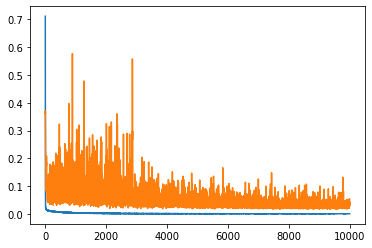

In [8]:
ax = plt.figure().add_subplot()
ax.plot(range(len(mean_squared_error)),mean_squared_error,label='train')
ax.plot(range(len(mean_squared_error)),val_mean_squared_error,label='val')

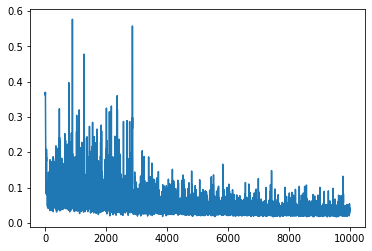

In [9]:
ax = plt.figure().add_subplot()
ax.plot(range(len(mean_squared_error)),val_mean_squared_error,label='val')

In [10]:
pre = model.predict(Xtest, batch_size=BATCH_SIZE)
print(pre)

[[0.20591846 0.7875555  0.2731497 ]
 [0.41194126 0.2332008  0.17360249]
 [0.41933858 0.68251336 0.7151754 ]
 ...
 [0.22838601 0.05460268 0.5186677 ]
 [0.8081132  0.46775067 0.5588845 ]
 [0.73237395 0.93197006 0.63847005]]


In [11]:
ae=np.maximum(pre-Ytest,Ytest-pre)
# print(ae)
mae0=np.mean(ae[:,0])
mae1=np.mean(ae[:,1])
mae2=np.mean(ae[:,2])
mse0 = math.sqrt(mae0)
mse1 = math.sqrt(mae1)
mse2 = math.sqrt(mae2)
print("\nMAE0: {:.3f}, MAE1: {:.3f}, MAE2: {:.3f},".format(mae0, mae1,mae2))
print("\nMSE0: {:.3f}, MSE1: {:.3f}, MSE2: {:.3f},".format(mse0, mse1,mse2))



MAE0: 0.230, MAE1: 0.020, MAE2: 0.138,

MSE0: 0.480, MSE1: 0.142, MSE2: 0.372,


In [12]:
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.plot(pre,label='predctions')
plt.subplot(212)
plt.plot(Ytest,label='origin')
plt.legend()
plt.show()

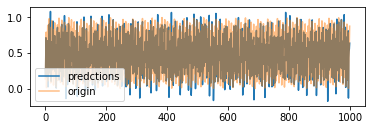

In [13]:
plt.figure(1)
plt.subplot(211)
plt.plot(pre[:,0],label='predctions',alpha=1)
plt.plot(Ytest[:,0],label='origin',alpha=0.5)
plt.legend(['predctions','origin'])

plt.figure(2)
plt.subplot(211)
plt.plot(pre[:,1],label='predctions',alpha=1)
plt.plot(Ytest[:,1],label='origin',alpha=0.5)
plt.legend()

plt.figure(3)
plt.subplot(211)
plt.plot(pre[:,2],label='predctions',alpha=1)
plt.plot(Ytest[:,2],label='origin',alpha=0.5)
plt.legend()
plt.show()

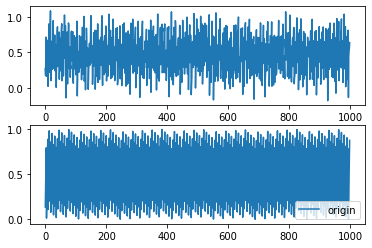

In [14]:
plt.figure(1)
plt.subplot(211)
plt.plot(pre[:,0],label='predctions')
plt.subplot(212)
plt.plot(Ytest[:,0],label='origin')
plt.legend(['predctions','origin'])

plt.figure(2)
plt.subplot(211)
plt.plot(pre[:,1],label='predctions')
plt.subplot(212)
plt.plot(Ytest[:,1],label='origin')
plt.legend()

plt.figure(3)
plt.subplot(211)
plt.plot(pre[:,2],label='predctions')
plt.subplot(212)
plt.plot(Ytest[:,2],label='origin')
plt.legend()
plt.show()

In [15]:
origin_Y = np.load('/home/chase/Boyka/Lyu/fac_cond256_unit8.npz')['fac'].astype(np.float64)
origin_Y_test=origin_Y[-1000:]
print(origin_Y_test)
pre_Y=np.zeros(origin_Y_test.shape)
pre_Y[:,0]=pre[:,0]*(y_max[0]-y_min[0])+y_min[0]
pre_Y[:,1]=pre[:,1]*(y_max[1]-y_min[1])+y_min[1]
pre_Y[:,2]=pre[:,2]*(y_max[2]-y_min[2])+y_min[2]
print(pre_Y)

[[1.828456 0.825891 0.00412 ]
 [2.354607 0.771756 0.010689]
 [2.880759 0.817621 0.017258]
 ...
 [2.401155 0.75331  0.013189]
 [2.927307 0.799175 0.019758]
 [3.453458 0.84504  0.026327]]
[[1.82461345 0.82875353 0.00819694]
 [2.64826703 0.7733441  0.00521182]
 [2.67784071 0.81825423 0.02145196]
 ...
 [1.91443586 0.75549269 0.01555929]
 [4.23211336 0.7967881  0.01676527]
 [3.929317   0.84318817 0.0191518 ]]


In [16]:
ae=np.maximum(pre_Y-origin_Y_test,origin_Y_test-pre_Y)
print(ae)
mae0=np.mean(ae[:,0])
mae1=np.mean(ae[:,1])
mae2=np.mean(ae[:,2])
mse0 = math.sqrt(mae0)
mse1 = math.sqrt(mae1)
mse2 = math.sqrt(mae2)
print("\nMAE0: {:.3f}, MAE1: {:.3f}, MAE2: {:.3f},".format(mae0, mae1,mae2))
print("\nMSE0: {:.3f}, MSE1: {:.3f}, MSE2: {:.3f},".format(mse0, mse1,mse2))

[[3.84254804e-03 2.86253098e-03 4.07693971e-03]
 [2.93660031e-01 1.58809952e-03 5.47718197e-03]
 [2.02918290e-01 6.33232407e-04 4.19396311e-03]
 ...
 [4.86719137e-01 2.18268723e-03 2.37028774e-03]
 [1.30480636e+00 2.38690357e-03 2.99273148e-03]
 [4.75858998e-01 1.85183338e-03 7.17519876e-03]]

MAE0: 0.919, MAE1: 0.002, MAE2: 0.004,

MSE0: 0.959, MSE1: 0.045, MSE2: 0.064,


In [17]:
y_max[0]-y_min[0],y_max[1]-y_min[1],y_max[2]-y_min[2]


(3.9978760000000007, 0.09995299999999996, 0.029987)

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.plot(pre_Y,label='predctions')
plt.subplot(212)
plt.plot(origin_Y_test,label='origin')
plt.legend()
plt.show()

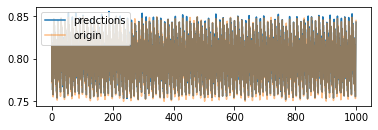

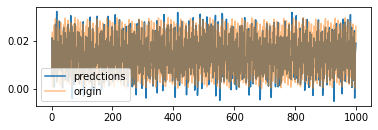

In [19]:
plt.figure(1)
plt.subplot(211)
plt.plot(pre_Y[:,0],label='predctions',alpha=1)
plt.plot(origin_Y_test[:,0],label='origin',alpha=0.5)
plt.legend(['predctions','origin'])

plt.figure(2)
plt.subplot(211)
plt.plot(pre_Y[:,1],label='predctions',alpha=1)
plt.plot(origin_Y_test[:,1],label='origin',alpha=0.5)
plt.legend()

plt.figure(3)
plt.subplot(211)
plt.plot(pre_Y[:,2],label='predctions',alpha=1)
plt.plot(origin_Y_test[:,2],label='origin',alpha=0.5)
plt.legend()
plt.show()